# Сборный проект. Анализ рынка компьютерных игр для интернет-магазина «Стримчик»
Мы рассматриваем данные рынка компьютерных игр и консолей по всему миру. Нам доступны данные из открытых источников за несколько лет:<br>
1. Данные о продажах игр в разных регионах
2. Данные о жанрах игр
3. Данные о платформах и консолях
4. Оценки пользователей и экспертов
5. Рейтинги игр ESRB<br>
Наша задача проанализировать данные, выявить закономерности и проверить несколько гипотез для того чтобы спрогнозировать продажи на 2017 год: <br>
1. Провести исследовательский анализ данных по актуальным данным и рассмотреть:
    - Сколько игр выпускалось в разные годы
    - Как менялись продажи по платформам
    - Какие платформы лидируют, а какие наооборот падают. Какие из них потенциально прибыльные
    - Построить диаграмму размаха по глобальным продажам игр в разбивке по платформам
    - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
    - Можно ли соотнести сделанные выводы с продажами игр на других платформах.
    - Общее распределение игр по жанрам. Какие жанры самые прибыльные. Выделяются ли жанры с высокими и низкими продажами.
2. Составить портрет пользователя каждого региона:
    - Самые популярные платформы (топ-5). Различия в долях продаж.
    - Самые популярные жанры (топ-5)
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе
3. Проверить гипотезы
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Средние пользовательские рейтинги жанров Action и Sports разные.<br>

Нам доступен датафрейм /datasets/games.csv. Он состоит из одной таблицы с полями:<br>
    <li>Name — название игры</li>
    <li>Platform — платформа</li>
    <li>Year_of_Release — год выпуска</li>
    <li>Genre — жанр игры</li>
    <li>NA_sales — продажи в Северной Америке (миллионы проданных копий)</li>
    <li>EU_sales — продажи в Европе (миллионы проданных копий)</li>
    <li>JP_sales — продажи в Японии (миллионы проданных копий)</li>
    <li>Other_sales — продажи в других странах (миллионы проданных копий)</li>
    <li>Critic_Score — оценка критиков (максимум 100)</li>
    <li>User_Score — оценка пользователей (максимум 10)</li>
    <li>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг         компьютерных игр и присваивает им подходящую возрастную категорию.</li>

Загружаем необходимые библиотеки

In [2]:
pip install pandas-profiling[notebook]

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import binom, norm
from datetime import datetime
import re
import math
from pandas_profiling import ProfileReport
%matplotlib inline

### Шаг. Откройте файл с данными и изучите общую информацию

In [5]:
games = pd.read_csv('/Users/denismaslov/yandex_projects/yandex/common_project_1_4/games.csv')
display(games.head(10))
games.info()
#games.hist(bins=100, figsize=(8, 8))

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
profile = ProfileReport(games, title="Pandas Profiling Report")

# запускаем показ профиля
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Если посмотреть на датафрейм, то мы видим, что в нем присутствуют пропуски. Колонка Year_of_Release имеет тип float, но так как год это целочисленное значение, то лучше здесь будет int. Также колонка User_Score строковый тип вместо float.

In [7]:
games['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [8]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Неявных дубликатов в названиях игр, жанров и платформ не выявлено.

In [11]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропущенные значения' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')



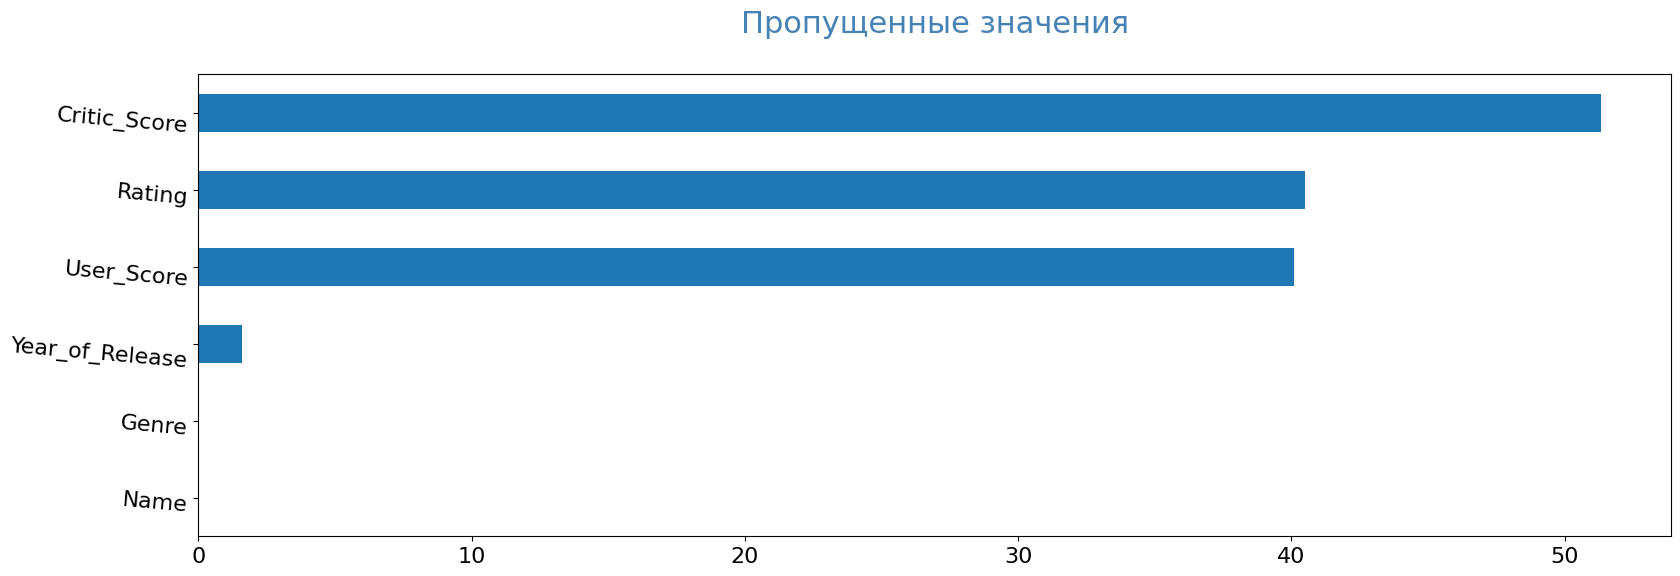

In [12]:
pass_value_barh(games)

Касательно year_of_release можно сказать, что скорее всего пропуски могли возникнуть по 2 причинам: 1. Забыли указать, 2. Точная дата релиза неизвестна по каким то причинам - мы не знаем кто и когда составлял этот датасет.<br>
Касательно оценок пользователей и критиков - скорее всего игры еще не получили необходимое количество оценок для присвоения им определенного показателя или вовсе не были оценены.<br>
Касательно 2 пропущеных значения в колонки name и genre, то это могла возникнуть либо ошибка при заполнении, что на мой взгляд скорее всего, либо например, игра не имеет четкого утвержденного названия или жанр ее не определен.

### Шаг. Подготовьте данные

#### Приведем все названия столбцов к нижнему регистру.

In [13]:
games.columns = map(str.lower, games.columns)
display(games.head(10))
games.info()
games.isnull().sum()

name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Работа с пропусками и типами

Посмотрим что за пропуски в столбце name

In [14]:
games[games['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

В этих строках полностью отсутствует какая либо полезная информация, поэтому удалим их. Также пропущенные значения в genre также находятся в этих строках

In [15]:
games = games.dropna(subset=['name'])
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Пропуски в колонке year_of_release. Их общее количество около 1,5% от всех данных, считаю что эта малая часть не может оказать существенного влияния на общие выводы, поэтому также предлагаю удалить их. Тем более при отстуствии информации о годе, мы не сможем строить прогноз на этих данных.

In [16]:
n_games = games[games['year_of_release'].isnull()]
games_n = pd.pivot_table(n_games, index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], \
                         aggfunc='sum').sort_values('na_sales', ascending=False)
display(games_n)

eu_sales  jp_sales  na_sales  other_sales
platform                                           
PS2           6.66      1.66     10.92         2.97
Wii           3.89      1.05     10.03         1.36
2600          0.61      0.00      9.82         0.07
X360          2.44      0.13      6.73         0.88
XB            1.30      0.00      4.63         0.24
GBA           0.66      0.77      3.42         0.12
PS3           3.08      0.78      3.36         1.09
DS            0.48      0.55      2.09         0.22
PSP           1.06      0.90      1.90         0.66
PS            1.22      0.04      1.80         0.22
GC            0.39      0.24      1.52         0.05
PC            2.07      0.00      1.19         0.50
3DS           0.21      0.05      0.84         0.09
GB            0.31      0.00      0.68         0.04
N64           0.03      0.46      0.11         0.07
PSV           0.05      0.07      0.11         0.03

Продажи игр, в колонке которых пропущен год релиза не принесли каких либо серьезных продаж, поэтому их можно удалить

In [17]:

games = games.dropna(subset=['year_of_release'])
games.isnull().sum()


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Рассмотрим какие уникальные значения есть в колонке user_score.

In [18]:
display(games['user_score'].unique())
#display(games['user_score'].value_counts())
#games['user_score'] = games['user_score'].astype(float)
games.info()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Помимо пропусков, мы также видим значение tbd, что означает "to be determind" или "будет определено". В отношении рейтинга, это значение может иметь игра, которая еще не набрала достаточное количество пользовательских оценок для присвоения ей рейтинга, поэтому применяют это значение. 

Приведем столбец user_score к типу float методом to_numeric().

In [19]:
games['user_score'] = pd.to_numeric(games['user_score'], downcast='float', errors ='coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.4+ MB


In [20]:
display(games['user_score'].unique())

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7], dtype=float32)

При приведении колонки к типу float, все значения tbd также стали NaN, что нам даже удобнее. 

Посмотрим на медианные значения critic_score и user_score в зависимости от жанра. Потому как я допускаю, что в разных жанрах пользовательские оценки и оценки критиков могут быть разными

In [21]:
display(games['critic_score'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [22]:
median_scores_critic = games.groupby('genre')[['critic_score']].median()
print(median_scores_critic)
median_scores_user = games.groupby('genre')[['user_score']].median()
print(median_scores_user)

              critic_score
genre                     
Action                68.0
Adventure             66.0
Fighting              72.0
Misc                  69.0
Platform              69.5
Puzzle                70.0
Racing                69.0
Role-Playing          74.0
Shooter               73.0
Simulation            70.0
Sports                75.0
Strategy              73.0
              user_score
genre                   
Action               7.4
Adventure            7.6
Fighting             7.6
Misc                 7.1
Platform             7.7
Puzzle               7.5
Racing               7.4
Role-Playing         7.8
Shooter              7.4
Simulation           7.5
Sports               7.4
Strategy             7.8


In [23]:
# check
games.groupby(['genre', 'platform', 'year_of_release'])[['critic_score']].median().tail(20)

critic_score
genre    platform year_of_release              
Strategy Wii      2010.0                   58.0
                  2011.0                    NaN
                  2013.0                    NaN
         WiiU     2012.0                    NaN
                  2013.0                   87.0
         X360     2006.0                   79.0
                  2007.0                   73.0
                  2008.0                   66.5
                  2009.0                   75.5
                  2010.0                   78.0
                  2012.0                   90.0
                  2013.0                   59.0
         XB       2002.0                   67.0
                  2003.0                   69.0
                  2004.0                   68.0
                  2005.0                   69.0
                  2006.0                   69.0
         XOne     2013.0                   53.0
                  2015.0                    NaN
                  2016.0                   87.0

In [24]:
# check
games.groupby(['genre', 'platform', 'year_of_release'])[['user_score']].median().tail(20)

user_score
genre    platform year_of_release            
Strategy Wii      2010.0                  NaN
                  2011.0                  NaN
                  2013.0                 2.80
         WiiU     2012.0                  NaN
                  2013.0                 7.75
         X360     2006.0                 7.50
                  2007.0                 7.10
                  2008.0                 6.95
                  2009.0                 7.00
                  2010.0                 7.05
                  2012.0                 8.30
                  2013.0                 5.60
         XB       2002.0                 8.40
                  2003.0                 8.40
                  2004.0                 7.95
                  2005.0                 7.50
                  2006.0                  NaN
         XOne     2013.0                 6.90
                  2015.0                  NaN
                  2016.0                 8.10

Если рассмотреть медианные значения в таком разрезе, то становится видно, что даже в рамках одного жанра, на одной платформе медианные значения сильно отличаются в разные годы, а есть еще различие между платформами. В таком случае,  так как выбор не велик: заполнить константой (думаю подойдет заполнить 0, так как для части исследования значения столбцов с критикой нам не нужны, а когда будет исследовать влияние критики на продажи, срежем эти значения.), заполнить средним или медианой (нам не подошло), или удалить.

Предлагаю заполнить пропущенные значения в колонках critic_score и user_score - 0

In [25]:
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [26]:
games['user_score'] = games['user_score'].fillna(0)
#games = games.dropna(subset=['user_score'])
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score            0
rating             6676
dtype: int64

In [27]:
games['critic_score'] = games['critic_score'].fillna(0)
#games = games.dropna(subset=['critic_score'])
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float32
 10  rating           9768 non-null   object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.4+ MB


In [24]:
#col_to_change = ['critic_score', 'user_score']
#genre_medians = games.groupby('genre')[col_to_change].median()
#games['critic_score'] = games['critic_score'].fillna(games['genre'].map(genre_medians['critic_score']))
#games['user_score'] = games['user_score'].fillna(games['genre'].map(genre_medians['user_score']))
#display(games.head(10))
#display(genre_medians)
#games.isnull().sum()

Приведем столбец year_of_release к типу int.

In [29]:
games['year_of_release'] = games['year_of_release'].astype(int)
games.info()
display(games.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float32
 10  rating           9768 non-null   object 
dtypes: float32(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     41.36     28.96      3.77         8.45          76.0         8.0      E  
1     29.08      3.58      6.81         0.77           0.0         0.0    NaN  
2     15.68     12.76      3.79         3.29          82.0         8.3      E  
3     15.61     10.93      3.28         2.95          80.0         8.0      E  
4     11.27      8.89     10.22         1.00           0.0         0.0    NaN  
5     23.20      2.26      4.22         0.58           0.0         0.0    NaN  
6     11.28      9.14      6.50         2.88          89.0         8.5      E  
7     13.96      9.18      2.93         2.84          58.0         6.6      E  
8     14.44      6.94      4.70         2.24          87.0         8.4      E  
9     26.93      0.63      0.28         0.47           0.0         0.0    NaN

<b> Изначально разберемся, что означает рейтинг ESRB: </b> <br>
«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, 
которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, 
изначально разрабатываются для детей и обычно представляют собой развивающие игры.

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. 
Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного 
или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, 
грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, 
большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. 
Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. 
Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». 
Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант<br>

In [30]:
games['rating'].value_counts()

rating
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [31]:
games.groupby('genre')['rating'].value_counts()

genre         rating
Action        T          670
              M          596
              E10+       468
              E          410
              EC           1
              AO           1
Adventure     E          159
              T          114
              M           98
              E10+        67
              EC           2
Fighting      T          357
              M           48
              E10+        19
              E            8
Misc          E          449
              T          228
              E10+       166
              M           13
              EC           5
              K-A          1
Platform      E          354
              E10+       141
              T           63
              M            3
Puzzle        E          284
              E10+        42
              T           10
Racing        E          576
              T          167
              E10+        95
              M           18
Role-Playing  T          415
              M       

In [32]:
display(games['rating'].unique())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Как мы видим, в датафрейме у нас есть рейтинг «E» («Everyone») — «Для всех» и "K-A" ("Kids to Adults"), которые относятся к одной и той же категории, просто "K-A" использовался ранее. Поэтому заменим в датафрейме "K-A" на «E» для более точного анализа.

In [33]:
games['rating'] = games['rating'].replace('K-A', 'E', regex=True)
display(games['rating'].unique())

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [34]:
games.groupby('genre')['rating'].value_counts()

genre         rating
Action        T          670
              M          596
              E10+       468
              E          410
              EC           1
              AO           1
Adventure     E          159
              T          114
              M           98
              E10+        67
              EC           2
Fighting      T          357
              M           48
              E10+        19
              E            8
Misc          E          450
              T          228
              E10+       166
              M           13
              EC           5
Platform      E          354
              E10+       141
              T           63
              M            3
Puzzle        E          284
              E10+        42
              T           10
Racing        E          576
              T          167
              E10+        95
              M           18
Role-Playing  T          415
              M          161
              E10+    

К сожалению нельзя сказать что все игры какого то жанра приемущественно имеют один и тот же рейтинг. В таком случаем, ничего не остается как удалить эти пропуски, иначе это может привести к искаженной картине при определении портрета пользователя. Но также можно и заполнить эти пропуски константой, например NR, которые не помешают нам анализировать другие данные, а когда нам необходимо будет анализировать портрет пользователя, мы их исключим.

In [35]:
games['rating'] = games['rating'].fillna('NR')
#games = games.dropna(subset=['rating'])
#games.isnull().sum()
games.groupby('genre')['rating'].value_counts()

genre     rating
Action    NR        1161
          T          670
          M          596
          E10+       468
          E          410
                    ... 
Strategy  T          160
          E10+        76
          E           70
          M           25
          RP           1
Name: count, Length: 64, dtype: int64

In [36]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
dtypes: float32(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [69]:
#genre_list = games['genre'].unique()
#print(genre_list)

In [34]:
#genre_nan = {}
#for genre in genre_list:
#    rating_value = games[games['genre'] == genre]['rating'].value_counts()
#    genre_nan[genre] = rating_value.index[0]
#genre_nan

In [35]:
#games['rating'] = games['rating'].fillna('not_rating')

In [36]:
#def fill_rating(row):
#    if row[-1] == 'not_rating':
#        row[-1] = genre_nan[row[3]]
#    return row

In [37]:
#games = games.apply(fill_rating, axis=1)
#display(games['rating'].unique())
#games.info()
#games.isnull().sum()

Пустых значений больше нет.

In [37]:
# check
games['rating'].value_counts()

rating
NR      6676
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: count, dtype: int64

Я решил заполнить пропущенные значения ESRB значением NR, чтобы удаление этих строк не помешало анализировать продажи. Когда будет изучать влияние рейтинга, эти строки исключим.

#### Проверка дубликатов

Для начала переведем все категориальные столбцы в нижний регистр.

In [38]:
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
display(games.head(10))

name platform  year_of_release         genre  \
0                 wii sports      wii             2006        sports   
1          super mario bros.      nes             1985      platform   
2             mario kart wii      wii             2008        racing   
3          wii sports resort      wii             2009        sports   
4   pokemon red/pokemon blue       gb             1996  role-playing   
5                     tetris       gb             1989        puzzle   
6      new super mario bros.       ds             2006      platform   
7                   wii play      wii             2006          misc   
8  new super mario bros. wii      wii             2009      platform   
9                  duck hunt      nes             1984       shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     41.36     28.96      3.77         8.45          76.0         8.0      E  
1     29.08      3.58      6.81         0.77           0.0         0.0     NR  
2     15.68     12.76      3.79         3.29          82.0         8.3      E  
3     15.61     10.93      3.28         2.95          80.0         8.0      E  
4     11.27      8.89     10.22         1.00           0.0         0.0     NR  
5     23.20      2.26      4.22         0.58           0.0         0.0     NR  
6     11.28      9.14      6.50         2.88          89.0         8.5      E  
7     13.96      9.18      2.93         2.84          58.0         6.6      E  
8     14.44      6.94      4.70         2.24          87.0         8.4      E  
9     26.93      0.63      0.28         0.47           0.0         0.0     NR

In [39]:
print('Количество дубликатов:', games.duplicated(['name', 'platform', 'year_of_release']).sum())

Количество дубликатов: 1


In [40]:
games[games.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

name platform  year_of_release   genre  na_sales  eu_sales  \
604    madden nfl 13      ps3             2012  sports      2.11      0.22   
16230  madden nfl 13      ps3             2012  sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
604         0.0         0.23          83.0         5.5      E  
16230       0.0         0.00          83.0         5.5      E

По сумме параметров есть 2 дубликата, удалим один из них.

In [41]:
games.drop([16230],inplace=True)

In [42]:

print('Количество дубликатов:', games.duplicated(['name', 'platform', 'year_of_release']).sum())

Количество дубликатов: 0


Больше дубликатов нет

#### Подсчет суммарных продаж

Создадим столбец total_sales, в который суммируем продажи из всех регионов.

In [43]:
#games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [44]:
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [45]:
display(games.head(10))
games.info()
#games.hist(bins=100, figsize=(8, 8))

name platform  year_of_release         genre  \
0                 wii sports      wii             2006        sports   
1          super mario bros.      nes             1985      platform   
2             mario kart wii      wii             2008        racing   
3          wii sports resort      wii             2009        sports   
4   pokemon red/pokemon blue       gb             1996  role-playing   
5                     tetris       gb             1989        puzzle   
6      new super mario bros.       ds             2006      platform   
7                   wii play      wii             2006          misc   
8  new super mario bros. wii      wii             2009      platform   
9                  duck hunt      nes             1984       shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     41.36     28.96      3.77         8.45          76.0         8.0      E   
1     29.08      3.58      6.81         0.77           0.0         0.0     NR   
2     15.68     12.76      3.79         3.29          82.0         8.3      E   
3     15.61     10.93      3.28         2.95          80.0         8.0      E   
4     11.27      8.89     10.22         1.00           0.0         0.0     NR   
5     23.20      2.26      4.22         0.58           0.0         0.0     NR   
6     11.28      9.14      6.50         2.88          89.0         8.5      E   
7     13.96      9.18      2.93         2.84          58.0         6.6      E   
8     14.44      6.94      4.70         2.24          87.0         8.4      E   
9     26.93      0.63      0.28         0.47           0.0         0.0     NR   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  
5        30.26  
6        29.80  
7        28.91  
8        28.32  
9        28.31

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float32
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


#### Время, за которое представлены данные

In [46]:
print('В таблице представлены данные с:', games['year_of_release'].min(), 'г. по:', games['year_of_release'].max(), 'г.')

В таблице представлены данные с: 1980 г. по: 2016 г.


#### Заключение 2 шага

Итак, мы очистили данные, привели все необходимые столбцы к нужным типам, удалили часть пропущенных значений, заполнили пропуски в колонках оценки и рейтинга константой, с которыми будем работать по мере необходимости.

### Шаг. Проведите исследовательский анализ данных

#### Cколько игр выпускалось в разные годы

Выведем на график распределение выпускаемых игр по годам

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


/Users/denismaslov/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


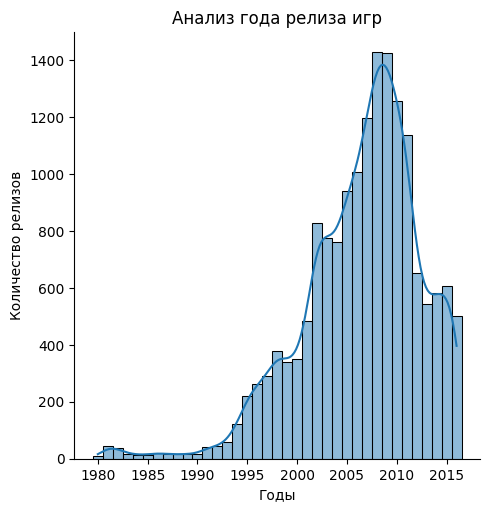

In [48]:
print(games['year_of_release'].describe())

ax = sns.displot(games['year_of_release'], discrete = True, kde = True)

plt.xlabel('Годы')
plt.ylabel('Количество релизов')
plt.title('Анализ года релиза игр')


plt.show()

Как мы видим из график, расцвет индустрии игр с ростом почти х2 начался с 1994 года. Поэтому "отсечем" данные за более ранние годы и перестоим график снова.

In [49]:
games = games.query('year_of_release >= 1994')

count    16078.000000
mean      2006.918460
std          5.138985
min       1994.000000
25%       2003.000000
50%       2008.000000
75%       2011.000000
max       2016.000000
Name: year_of_release, dtype: float64


/Users/denismaslov/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


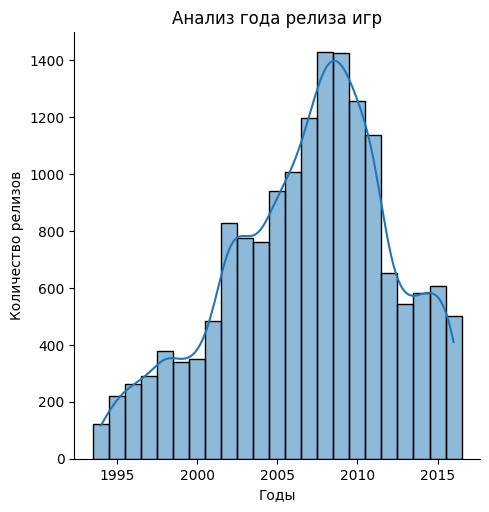

In [50]:
print(games['year_of_release'].describe())

ax = sns.displot(games['year_of_release'], discrete = True, kde = True)

plt.xlabel('Годы')
plt.ylabel('Количество релизов')
plt.title('Анализ года релиза игр')


plt.show()

In [51]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16078 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16078 non-null  object 
 1   platform         16078 non-null  object 
 2   year_of_release  16078 non-null  int64  
 3   genre            16078 non-null  object 
 4   na_sales         16078 non-null  float64
 5   eu_sales         16078 non-null  float64
 6   jp_sales         16078 non-null  float64
 7   other_sales      16078 non-null  float64
 8   critic_score     16078 non-null  float64
 9   user_score       16078 non-null  float32
 10  rating           16078 non-null  object 
 11  total_sales      16078 non-null  float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь мы видим, что данные по годам нормально распределены.<br> 
До 1990 года в основном выпускались аркадные игры, что было обусловлено и возможностями графики, и стоимостью платформ. С начала 90х рынок все больше начинают завоевывать шутеры и гонки. В 1994 выходит Need For Speed, которая врывается на рынок и до сих пор считается одной из десяти лучших игр за всю историю. В 1995 году в симуляторе раллийных гонок Sega Rally Championship был объединён кооператив и мультиплеер. Sega Rally также была первой игрой, в которой было реализовано движение по разным поверхностям (асфальт, гравий, грязь) с соответствующими эффектами вроде вылетающей грязи из-под колёс и с изменением управления автомобиля из-за сцепления с дорогой.<br>
<b>Отвечая на вопрос а важны ли все периоды для анализа, ответ - нет.</b>
Так как рынок игр в частности и компьютерных технологий в целом меняется очень стремительно, то практически не возможно строить форкаст на будущее, основываясь на данных 20ти летней давности, потому как и технологии и движки и железо изменились в корне.По графику мы видим, что начиная с 1994 года релизы начинают расти, это связано и с появлением новой графики, и удачными релизами, и плавным переходом от 8ми битной графики к 3D. 
Расцвет релиза разных игр приходится на 2008/2009 годы. К 2010 году ПК стали мощнее и дешевле, а игры — красивее. Игроки видели на экранах не угловатые модели персонажей в локациях с откровенно слабым и гейм-дизайном, а проработанных героев и NPC с огромным количеством полигонов. В период с 2005 по 2009 год прибыль в геймдеве возрастала на 10 % каждый год. Сами бюджеты на разработку уже давно перевалили за планку в 10 млн долларов. Финансовый кризис 2008 года притормозил бурный рост игровой индустрии. Акционеры залегли на дно, игровые студии не могли рассчитывать на серьезное финансирование, а некоторые студии закрывались. Это же время стало концом эпохи игр по мотивам фильмов, потому что покупка лицензий стала слишком дорогой. Пока растут бюджеты, но сокращают финансирование, незаметно возникает новый сектор инди-игр. Зачем вымаливать десятки миллионов у инвесторов с риском провалить проект и обанкротиться, если можно создать локальную студию из нескольких человек и делать игры «для своих». Да, с простой графикой, зато с новыми идеями. Иногда такие игры создавались на энтузиазме, совсем без инвестиций, только благодаря краудфандинговым платформам, количество которых увеличилось до 450 к 2012 году.
Инди доказали, что постановка и не вылизанная графика делает игру интересной. На первое место ставят идею. Лучшими представителями такого жанра можно назвать Braid, World of Goo, FeZ, Hotline Miami, The Binding of Isaac, Super Meat Boy и Minecraft. Успешность последнего можно вообще не комментировать.

#### Как менялись продажи по платформам

Посчитаем суммарные продажи по платформам.

In [52]:
platform_sales = pd.pivot_table(games, index='platform', values='total_sales', \
                                aggfunc='sum').sort_values('total_sales', ascending=False)
display(platform_sales)

total_sales
platform             
ps2           1233.56
x360           961.24
ps3            931.33
wii            891.18
ds             802.76
ps             727.58
ps4            314.14
gba            312.88
psp            289.53
3ds            257.81
pc             252.66
xb             251.57
n64            218.01
gc             196.73
xone           159.32
gb             152.08
snes            84.67
wiiu            82.19
psv             53.81
sat             33.59
dc              15.95
gen              8.13
ws               1.42
ng               1.23
scd              0.36
tg16             0.16
nes              0.11
3do              0.10
pcfx             0.03

Для анализа возьмем те платформфы, продажи по которым принесли от 500 млн проданных копий.

In [53]:
top_platforms = platform_sales.query('total_sales >= 500')
#top_platforms = list(platform_sales[platform_sales.total_sales >= 100])
print(top_platforms)

          total_sales
platform             
ps2           1233.56
x360           961.24
ps3            931.33
wii            891.18
ds             802.76
ps             727.58


In [54]:
#Создадим список платформ используемых для анализа
top_platforms_list = list(top_platforms.index[:])
print(top_platforms_list)

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']


ps2
                          total_sales
platform year_of_release             
ps2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45
       total_sales
count    12.000000
mean    102.796667
std      79.405729
min       0.450000
25%      35.977500
50%      89.705000
75%     170.900000
max     211.810000
x360
                          total_sales
platform year_of_release             
x360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010         

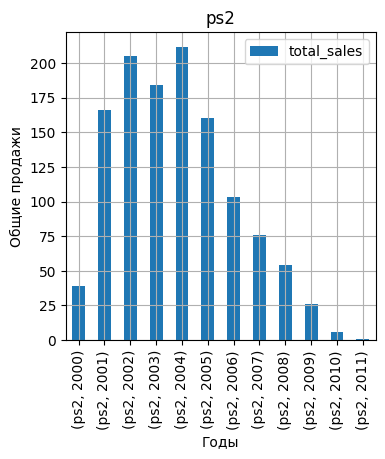

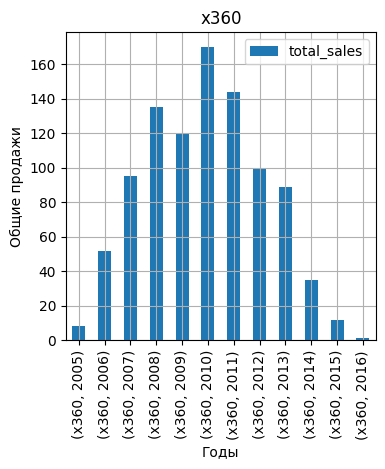

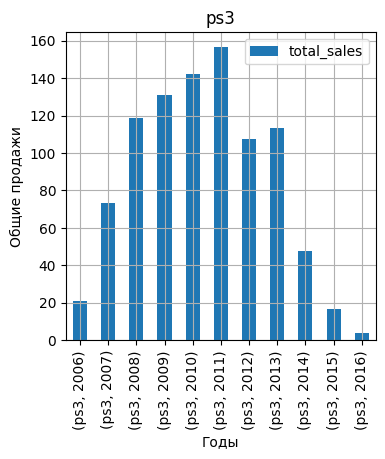

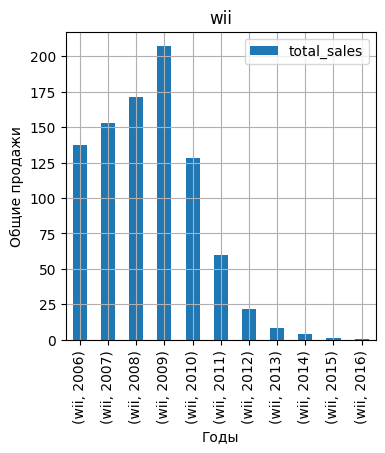

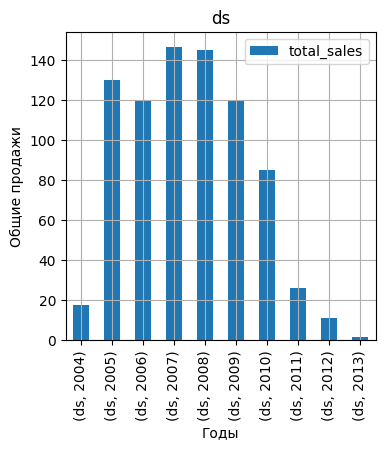

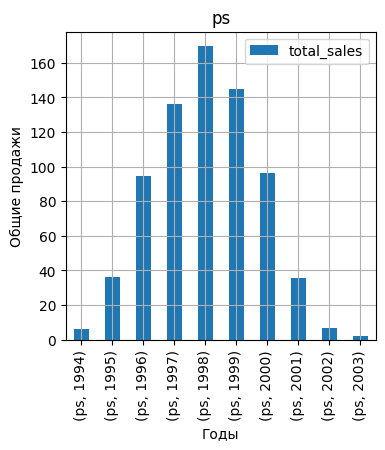

In [55]:
#Выведем продажи по годам анализируемых платформ, посчитаем распределение методом describe(),
#выведем график распредеоения по платформам
for platform in top_platforms_list:
    print(platform)
    platform_sales = pd.pivot_table(games.query('platform in @platform'), index=['platform','year_of_release'],\
                                    values='total_sales', aggfunc='sum')
    print(platform_sales)
    print(platform_sales.describe())
    platform_sales.plot(kind='bar', figsize=(4, 4), grid=True)
    plt.title(platform)
    plt.xlabel('Годы')
    plt.ylabel('Общие продажи')

Отдельно еще выведем данные по платформе PS4, так как мы видим, что платформы от Sony входят в ТОП игр, и отсутствие пока в ТОП PS4 связано скорее с ее недавним выходом.

ps4
                          total_sales
platform year_of_release             
ps4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
       total_sales
count     4.000000
mean     78.535000
std      40.567917
min      25.990000
25%      58.435000
50%      84.625000
75%     104.725000
max     118.900000


Text(0, 0.5, 'Общие продажи')

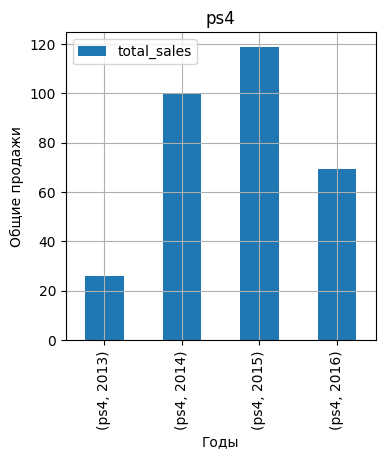

In [56]:
print('ps4')
platform_sales_ps4 = pd.pivot_table(games.query('platform == "ps4"'), index=['platform','year_of_release'], \
                                    values='total_sales', aggfunc='sum')
print(platform_sales_ps4)
print(platform_sales_ps4.describe())
platform_sales_ps4.plot(kind='bar', figsize=(4, 4), grid=True)
plt.title('ps4')
plt.xlabel('Годы')
plt.ylabel('Общие продажи')

Также выведем отдельно еще данные по платформе Xbox One, так она также является новой и еще не смогла набрать продажи для попадания в ТОП.

xone
                          total_sales
platform year_of_release             
xone     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15
       total_sales
count     4.000000
mean     39.830000
std      20.313977
min      18.960000
25%      24.352500
50%      40.110000
75%      55.587500
max      60.140000


Text(0, 0.5, 'Общие продажи')

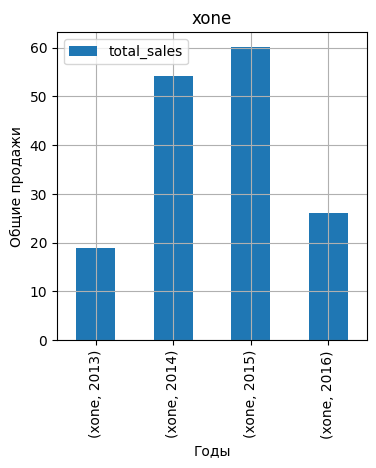

In [57]:
print('xone')
platform_sales_xone = pd.pivot_table(games.query('platform == "xone"'), index=['platform','year_of_release'], \
                                     values='total_sales', aggfunc='sum')
print(platform_sales_xone)
print(platform_sales_xone.describe())
platform_sales_xone.plot(kind='bar', figsize=(4, 4), grid=True)
plt.title('xone')
plt.xlabel('Годы')
plt.ylabel('Общие продажи')

3ds
                          total_sales
platform year_of_release             
3ds      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
       total_sales
count     6.000000
mean     42.968333
std      18.278261
min      15.140000
25%      31.775000
50%      47.560000
75%      55.267500
max      63.200000


Text(0, 0.5, 'Общие продажи')

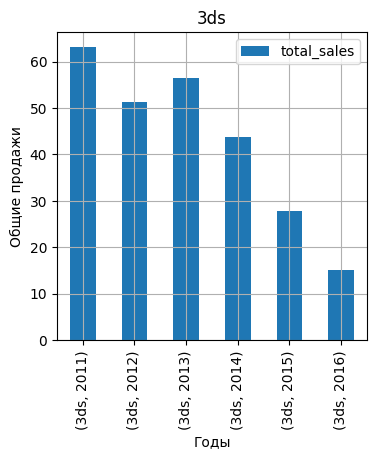

In [58]:
print('3ds')
platform_sales_3ds = pd.pivot_table(games.query('platform == "3ds"'), index=['platform','year_of_release'], \
                                    values='total_sales', aggfunc='sum')
print(platform_sales_3ds)
print(platform_sales_3ds.describe())
platform_sales_3ds.plot(kind='bar', figsize=(4, 4), grid=True)
plt.title('3ds')
plt.xlabel('Годы')
plt.ylabel('Общие продажи')

Если посмотреть релизы платформ от Sony (PS, PS2, PS3, PS4) и выходы платформ от Microsoft (X360, XOne) то мы увидим определенную закономерность:<br>
<li>PS 1994-2003</li>
<li>PS2 2000-2011</li>
<li>PS3 2006-2016</li>
<li>PS4 2013-2016</li><br>
<br>
<li>X360 2005-2016</li>
<li>Xbox One 2013-2016</li><br>
<br>
<li>Wii 2005-2016</li>
<li>Nintendo DS 2005-2016</li><br>
Как мы видим, срок жизни популярных игр составляет 9-11 лет. Каждая компания по разному выпускает обновление своих платформ, так например Sony делает это раз в 6-7 лет, Microsoft и Nintendo раз в 8 лет. После того как компании выпускают обновление своей платформы, "старая" живет еще около 3 лет. 

<b>Актуальный период для прогноза продаж</b><br>
Если мы проанализируем графики продаж популярных платформ, то увидим, что "лучшие" годы по продажам составляют 4-5 лет<br>
Выход последних версий популярных гигантов игровой индустрии пришелся на 2013 год.<br>
Обычно разработка игр начинается за 3-4 года до их релиза<br>
Исходя из этого предлагаю взять актуальный период для прогнозирования с 2013 года

На прогноз будущего года несомненно влияют цифры новых платформ, продажи которых еще не набрали обороты. В данном случае была мысль взять данные не более чем за 3 года, но ps4 и xone вышли в 2013 году, и в этот же год по логике должно начаться снижение продаж по старым платформам брендов, как это часто происходит и с релизом новых девайсов и смартфонов (типа нафига нужен старый айфон в июле, если в сентябре выходит новый), поэтому считаю, чтобы данные были более корректные, необходимо захватить эту границу.

In [59]:
#Подготовим данные за преиод с 2013 года
last_years = games.query('2013 <= year_of_release')
last_years_sales = pd.pivot_table(last_years, index=['platform'], values='total_sales', \
                                  aggfunc='sum').sort_values('total_sales', ascending=False)
display(last_years_sales)
last_years_sales_list = last_years['platform'].unique()
print(last_years_sales_list)

total_sales
platform             
ps4            314.14
ps3            181.43
xone           159.32
3ds            143.25
x360           136.80
wiiu            64.63
pc              39.43
psv             32.99
wii             13.66
psp              3.50
ds               1.54

['ps3' 'x360' 'ps4' '3ds' 'xone' 'wiiu' 'wii' 'pc' 'psv' 'ds' 'psp']


pc
                          total_sales
platform year_of_release             
pc       1994                   12.87
         1995                    4.22
         1996                   10.58
         1997                   11.27
         1998                    3.26
         1999                    4.74
         2000                    4.66
         2001                    5.47
         2002                    8.57
         2003                    8.84
         2004                   10.39
         2005                    4.37
         2006                    2.85
         2007                    9.28
         2008                   12.42
         2009                   16.91
         2010                   24.28
         2011                   35.03
         2012                   23.22
         2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
       total_sales
count    23.000000
mean     

Text(0, 0.5, 'Общие продажи')

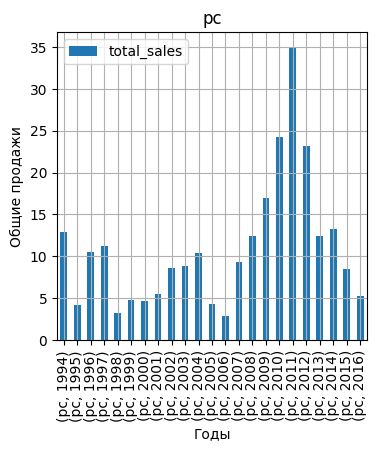

In [62]:
print('pc')
platform_sales_pc = pd.pivot_table(games.query('platform == "pc"'), index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
print(platform_sales_pc)
print(platform_sales_pc.describe())
platform_sales_pc.plot(kind='bar', figsize=(4, 4), grid=True)
plt.title('pc')
plt.xlabel('Годы')
plt.ylabel('Общие продажи')

psp
                          total_sales
platform year_of_release             
psp      2004                    7.06
         2005                   43.84
         2006                   55.32
         2007                   46.93
         2008                   34.55
         2009                   37.78
         2010                   35.04
         2011                   17.82
         2012                    7.69
         2013                    3.14
         2014                    0.24
         2015                    0.12
       total_sales
count    12.000000
mean     24.127500
std      20.190759
min       0.120000
25%       6.080000
50%      26.185000
75%      39.295000
max      55.320000


Text(0, 0.5, 'Общие продажи')

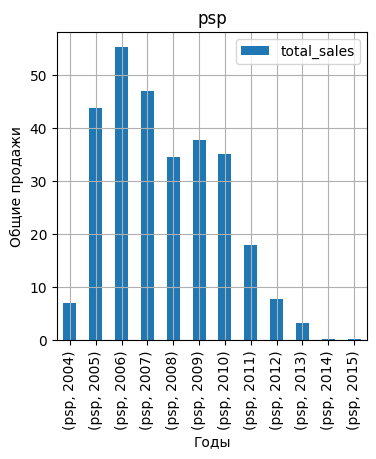

In [63]:
print('psp')
platform_sales_psp = pd.pivot_table(games.query('platform == "psp"'), index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
print(platform_sales_psp)
print(platform_sales_psp.describe())
platform_sales_psp.plot(kind='bar', figsize=(4, 4), grid=True)
plt.title('psp')
plt.xlabel('Годы')
plt.ylabel('Общие продажи')

PS4 совсем недавно вышла в релиз но уже лидирует по продажам. PS3 хотя и занимает второе место, но по предыдущим графикам видно что в следующем году она продаваться не будет. Такая же тенденция наблюдается и у других производителей - Xbox One выщла совсем недавно, но уже занимает 3 место, а вот продажи X360 стремятся к нулю, хотя на отрезке с 2013 года она и занимает 5 место. Соответственно, при прогнозировании продаж и закупок необходимо обратить внимание на новые релизы популярных гигантов - Sony, Microsoft и Nintendo, а также на игры для PC, так как они на протяжении долгого времени занимают свой сегмент рынка. Продажи портативных игр падают, на что скорее всего полияло развитие рынка смартфонов, куда и переместились портативные игры. Теперь нет необходимости иметь отдельную платформу для портативных игр.

#### Глобальные продажи в разрезе популярных платформ
Возьмем 3 самые продаваемые платформы PS3 и PS4 и XOne

In [64]:
games_last_year = games.query("2013 <= year_of_release")
#games_last_year = games.query("platform == ['PS3', 'PS4', 'XOne'] and 2013 <= year_of_release")
display(games_last_year.head(10))

name platform  year_of_release  \
16                         grand theft auto v      ps3             2013   
23                         grand theft auto v     x360             2013   
31                  call of duty: black ops 3      ps4             2015   
33                        pokemon x/pokemon y      3ds             2013   
42                         grand theft auto v      ps4             2014   
47  pokemon omega ruby/pokemon alpha sapphire      3ds             2014   
60                       call of duty: ghosts     x360             2013   
69                       call of duty: ghosts      ps3             2013   
72                                  minecraft     x360             2013   
77                                    fifa 16      ps4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16        action      7.02      9.09      0.98         3.96          97.0   
23        action      9.66      5.14      0.06         1.41          97.0   
31       shooter      6.03      5.86      0.36         2.38           0.0   
33  role-playing      5.28      4.19      4.35         0.78           0.0   
42        action      3.96      6.31      0.38         1.97          97.0   
47  role-playing      4.35      3.49      3.10         0.74           0.0   
60       shooter      6.73      2.56      0.04         0.91          73.0   
69       shooter      4.10      3.63      0.38         1.25          71.0   
72          misc      5.70      2.65      0.02         0.81           0.0   
77        sports      1.12      6.12      0.06         1.28          82.0   

    user_score rating  total_sales  
16         8.2      M        21.05  
23         8.1      M        16.27  
31         0.0     NR        14.63  
33         0.0     NR        14.60  
42         8.3      M        12.62  
47         0.0     NR        11.68  
60         2.6      M        10.24  
69         2.6      M         9.36  
72         0.0     NR         9.18  
77         4.3      E         8.58

count      mean       std   min     25%    50%     75%    max
platform                                                               
3ds       303.0  0.472772  1.381347  0.01  0.0400  0.090  0.2800  14.60
ds          8.0  0.192500  0.172026  0.03  0.0675  0.150  0.2525   0.51
pc        189.0  0.208624  0.352304  0.01  0.0300  0.080  0.2300   3.05
ps3       345.0  0.525884  1.451939  0.01  0.0400  0.150  0.5100  21.05
ps4       392.0  0.801378  1.609456  0.01  0.0600  0.200  0.7300  14.63
psp        67.0  0.052239  0.059768  0.01  0.0150  0.020  0.0700   0.24
psv       358.0  0.092151  0.153816  0.01  0.0200  0.040  0.1100   1.96
wii        23.0  0.593913  0.915432  0.01  0.0450  0.180  0.7550   3.58
wiiu      115.0  0.562000  1.038778  0.01  0.0600  0.200  0.5950   7.09
x360      186.0  0.735484  1.663275  0.01  0.0800  0.265  0.7950  16.27
xone      247.0  0.645020  1.036139  0.01  0.0600  0.220  0.6850   7.39

<Axes: title={'center': 'total_sales'}, xlabel='platform'>

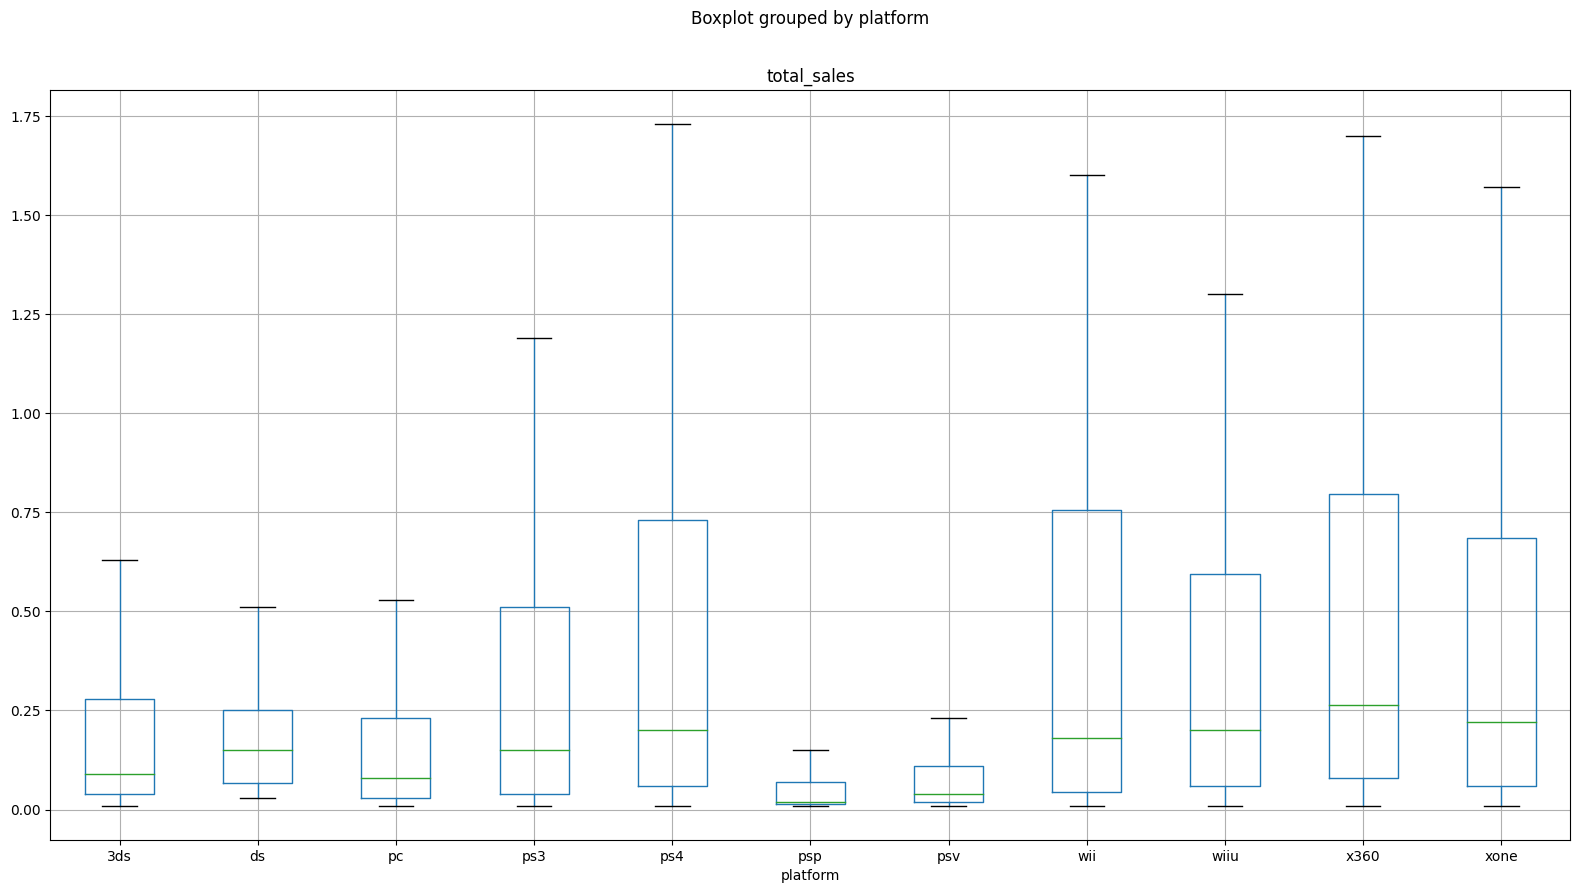

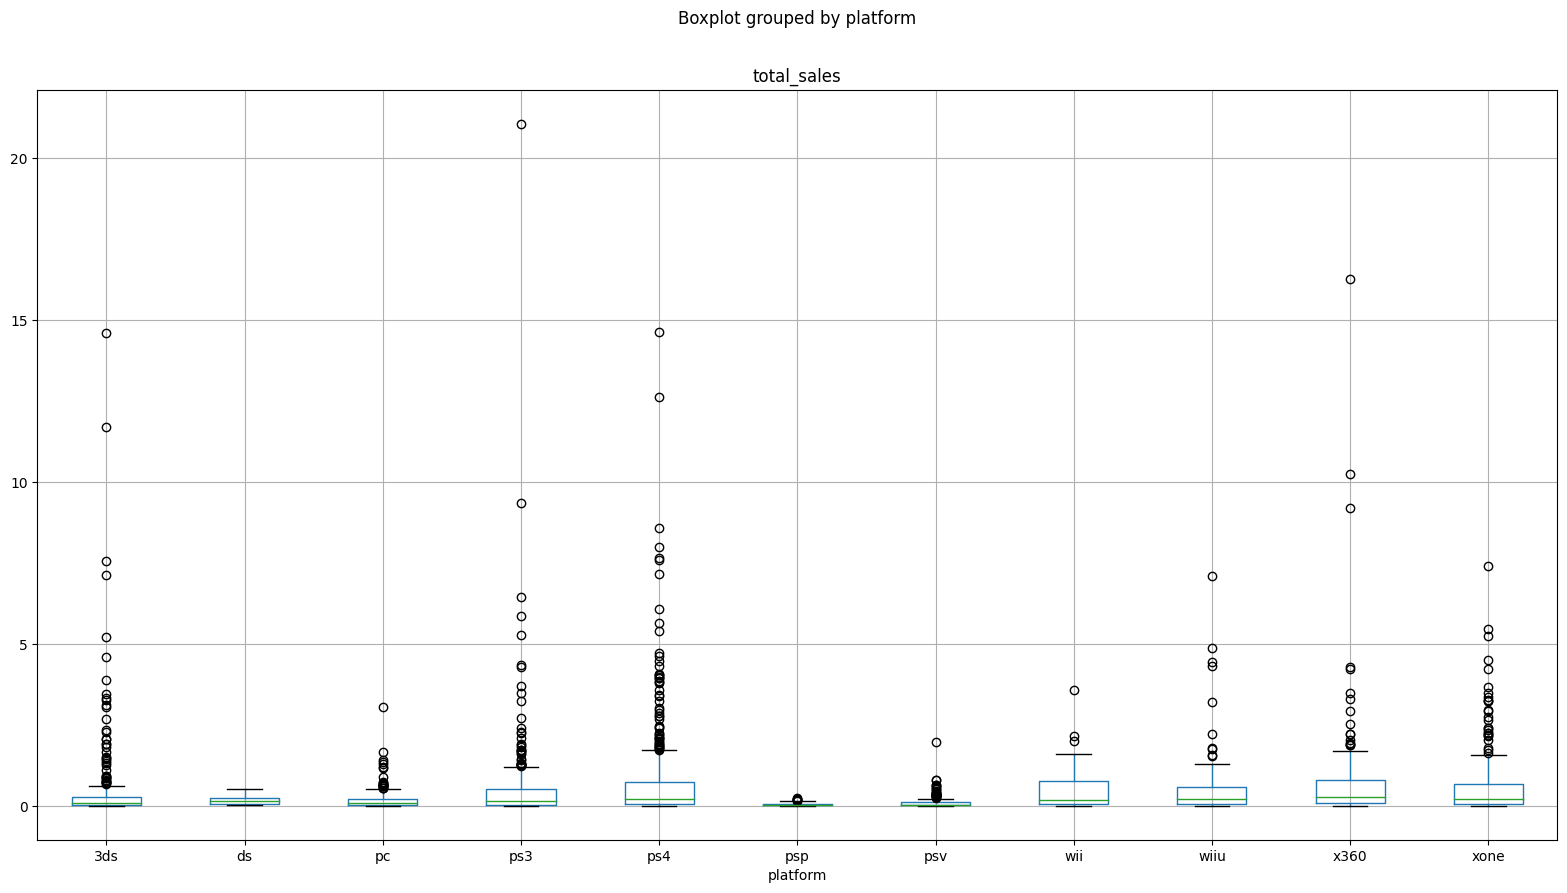

In [65]:
#Построим графики boxplot для самых продаваемых платформ
display(games_last_year.groupby('platform')['total_sales'].describe())
games_last_year.boxplot(column='total_sales', by='platform', figsize = (19,10), showfliers=False)
games_last_year.boxplot(column='total_sales', by='platform', figsize = (19,10), showfliers=True)


На графике мы видим, что популярность платформ не всегда зависит от "звездных" игр, например у wii нет таких больших выбросов как у ps3, но в среднем обьем продаж у нее больше. Хотя, безусловно, "звездный" контент всегда тащит за собой платформу. 

#### Как влияют на продажи одной популярной платформы отзывы критиков и пользователей.
Рассмотрим те же 3 самые популярные платформы PS4, PS3, XOne

Уберем из данных строки, которым мы присвоили константу

In [66]:
games_last_year_score = games_last_year.query("critic_score > 0 and user_score > 0")

In [67]:
ps4_sales = games_last_year_score.query('platform == "ps4"')
ps4_rating_sales = ps4_sales.loc[:, ['total_sales', 'critic_score', 'user_score']]
display(ps4_rating_sales.head(10))

total_sales  critic_score  user_score
42         12.62          97.0         8.3
77          8.58          82.0         4.3
92          7.66          83.0         5.7
94          7.60          85.0         5.0
105         7.17          87.0         6.5
143         6.08          82.0         5.7
154         5.64          76.0         6.1
171         5.39          93.0         7.9
231         4.62          86.0         8.1
245         4.47          77.0         3.4

In [68]:
display(ps4_rating_sales.corr().round(2))

total_sales  critic_score  user_score
total_sales          1.00          0.41       -0.03
critic_score         0.41          1.00        0.56
user_score          -0.03          0.56        1.00

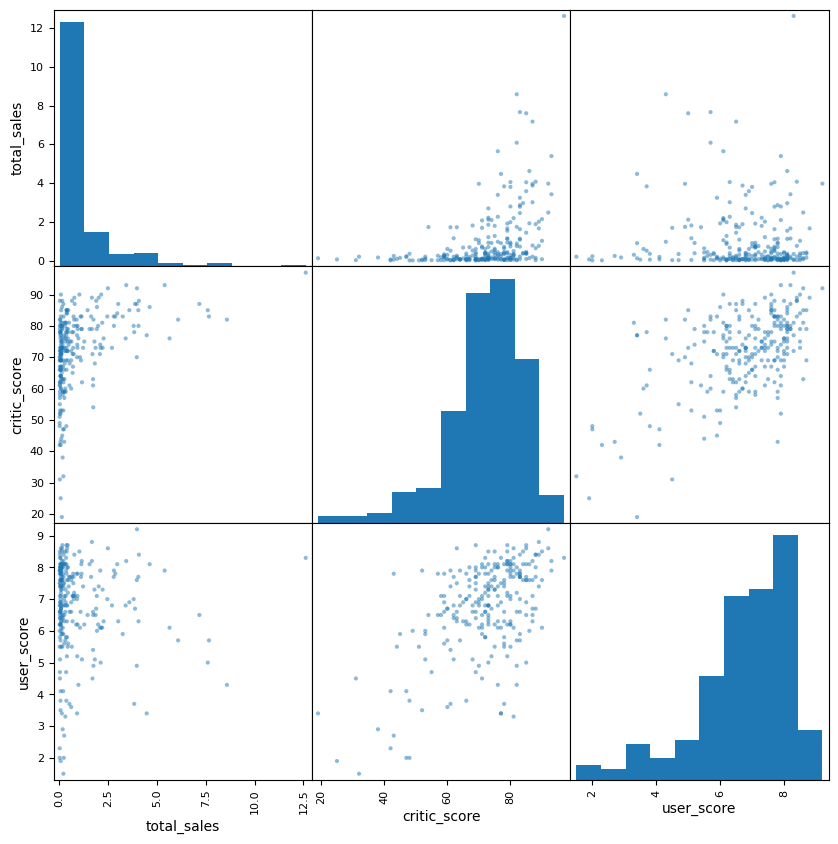

In [69]:
pd.plotting.scatter_matrix(ps4_rating_sales, figsize=(10,10));

Мы видим, что существует значительная прямая корреляция между продажами и оценкой критиков. Это говорит о том, что качество игры впрямую влияет на продажи. Хотя ввиду ее незначительности нельзя сделать однозначные выводы, но скорее всего связано это еще и с тем, что игра, оценненая пользователем, уже куплена, и какую бы оценку пользователь ей не поставил, впрямую это на продажи не влияет. Зато мы видим, что существует четкая зависимость оценки пользователей от оценки критиков, что делает важность оценки критиков еще ценнее, так как впрямую оказывает влияние на восприятие пользователей игры.

In [70]:
ps3_sales = games_last_year_score.query('platform == "ps3"')
ps3_rating_sales = ps3_sales.loc[:, ['total_sales', 'critic_score', 'user_score']]
display(ps3_rating_sales.head(10))

total_sales  critic_score  user_score
16         21.05          97.0         8.2
69          9.36          71.0         2.6
126         6.46          86.0         4.3
149         5.86          95.0         9.1
337         3.71          88.0         8.1
378         3.49          80.0         5.8
421         3.23          81.0         7.7
692         2.29          76.0         7.7
714         2.25          80.0         7.5
785         2.11          84.0         4.9

In [71]:
display(ps3_rating_sales.corr().round(2))

total_sales  critic_score  user_score
total_sales          1.00          0.33        0.02
critic_score         0.33          1.00        0.60
user_score           0.02          0.60        1.00

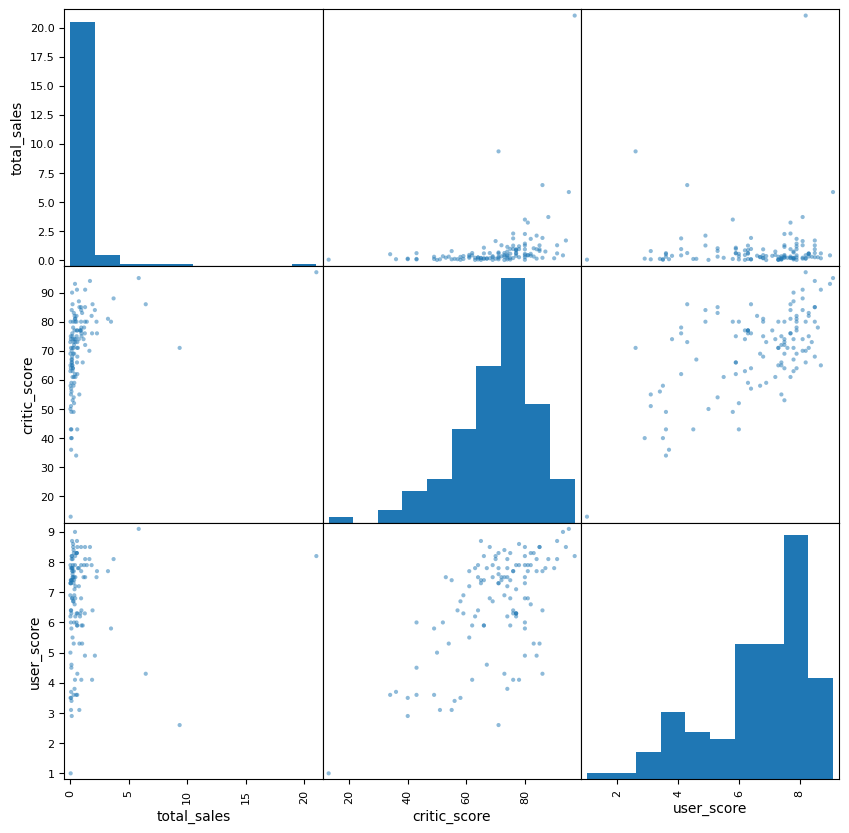

In [72]:
pd.plotting.scatter_matrix(ps3_rating_sales, figsize=(10,10));

По результатм PS3 все тенденции сохраняются, только выглядят чуть слабее.

In [73]:
xone_sales = games_last_year_score.query('platform == "xone"')
xone_rating_sales = xone_sales.loc[:, ['total_sales', 'critic_score', 'user_score']]
display(xone_rating_sales.head(10))

total_sales  critic_score  user_score
165         5.47          97.0         7.9
179         5.26          81.0         5.4
242         4.49          84.0         6.4
270         4.22          88.0         6.2
373         3.50          72.0         4.1
398         3.37          75.0         5.5
413         3.28          82.0         7.5
417         3.25          84.0         4.4
422         3.23          85.0         7.2
484         2.95          86.0         6.4

In [74]:
display(xone_rating_sales.corr().round(2))

total_sales  critic_score  user_score
total_sales          1.00          0.41       -0.09
critic_score         0.41          1.00        0.47
user_score          -0.09          0.47        1.00

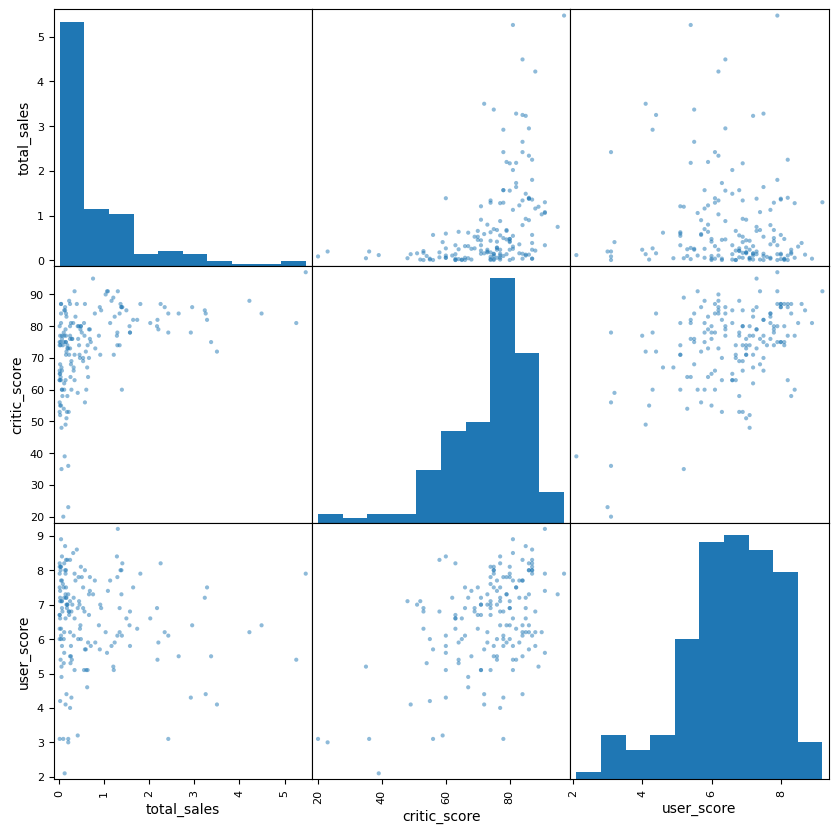

In [75]:
pd.plotting.scatter_matrix(xone_rating_sales, figsize=(10,10));

Результаты по Xbox One дают такие же результатытолько зависимость продаж от оценки критиков еще сильнее

Рассмотрим еще результаты игр для PC.

In [76]:
games_last_year_pc = games.query("platform == ['pc'] and 2013 <= year_of_release and critic_score > 0 and user_score > 0")
display(games_last_year_pc.head(10))

name platform  year_of_release  \
458                         the sims 4       pc             2014   
1095  starcraft ii: heart of the swarm       pc             2013   
1351                    simcity (2013)       pc             2013   
1437                     battlefield 4       pc             2013   
1530                         fallout 4       pc             2015   
1730                grand theft auto v       pc             2015   
2303          the elder scrolls online       pc             2014   
2784           dragon age: inquisition       pc             2014   
2829                total war: rome ii       pc             2013   
2851          the witcher 3: wild hunt       pc             2015   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
458     simulation      1.00      1.82       0.0         0.23          70.0   
1095      strategy      0.83      0.66       0.0         0.18          86.0   
1351    simulation      0.48      0.77       0.0         0.17          64.0   
1437       shooter      0.39      0.87       0.0         0.10          81.0   
1530  role-playing      0.51      0.67       0.0         0.10          84.0   
1730        action      0.39      0.69       0.0         0.09          96.0   
2303  role-playing      0.32      0.51       0.0         0.07          71.0   
2784  role-playing      0.33      0.34       0.0         0.06          85.0   
2829      strategy      0.12      0.53       0.0         0.07          76.0   
2851  role-playing      0.21      0.46       0.0         0.05          93.0   

      user_score rating  total_sales  
458          3.9      T         3.05  
1095         7.9      T         1.67  
1351         2.2   E10+         1.42  
1437         6.0      M         1.36  
1530         5.4      M         1.28  
1730         7.9      M         1.17  
2303         5.7      M         0.90  
2784         5.9      M         0.73  
2829         4.2      T         0.72  
2851         9.3      M         0.72

In [77]:
pc_sales = games_last_year_pc.query('platform == "pc"')
pc_rating_sales = pc_sales.loc[:, ['total_sales', 'critic_score', 'user_score']]
display(pc_rating_sales.head(10))

total_sales  critic_score  user_score
458          3.05          70.0         3.9
1095         1.67          86.0         7.9
1351         1.42          64.0         2.2
1437         1.36          81.0         6.0
1530         1.28          84.0         5.4
1730         1.17          96.0         7.9
2303         0.90          71.0         5.7
2784         0.73          85.0         5.9
2829         0.72          76.0         4.2
2851         0.72          93.0         9.3

In [78]:
display(pc_rating_sales.corr().head(2))

total_sales  critic_score  user_score
total_sales      1.000000      0.194124   -0.109235
critic_score     0.194124      1.000000    0.429562

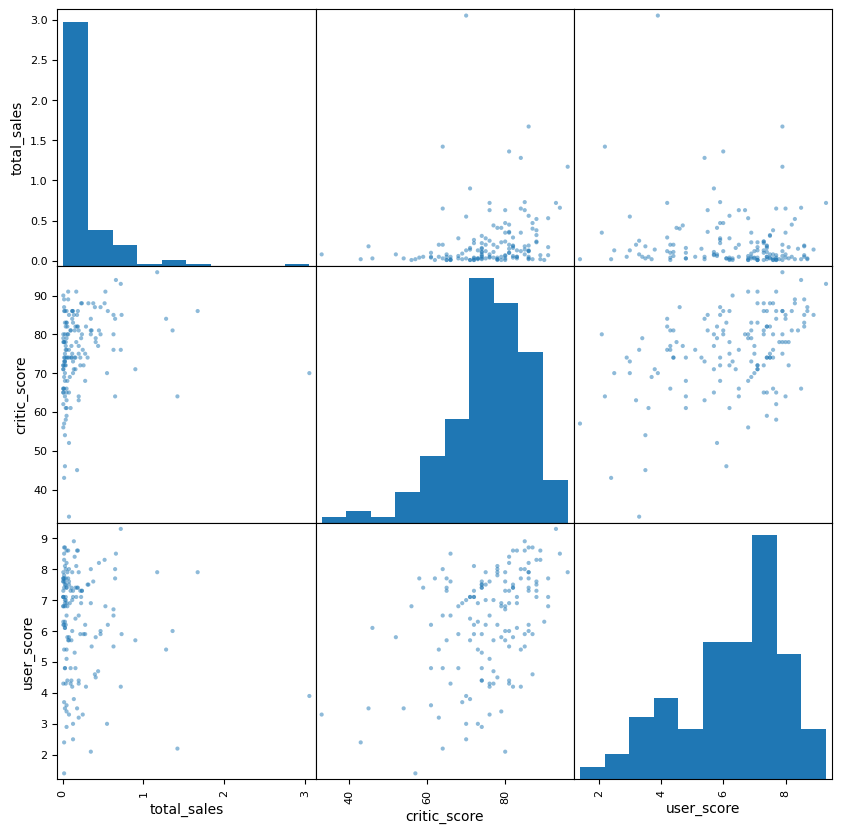

In [79]:
pd.plotting.scatter_matrix(pc_rating_sales, figsize=(10,10));

Здесь мы также видим, что зависимость слабее, но она такая же как и для остальных платформ.

<b>Итак вывод:</b><br>
<li>Существует прямая зависимость обьема продаж от оценки критиков</li>
<li>Продажи не зависят от оценки пользователей</li>
<li>Оценка пользователей впрямую зависит от оценки критиков</li>

Мы не можем быть на 100% уверены, на основе текущих данных, что это именно оценка критиков повлияла на рост продаж, а оценка пользователей наооборот не повлияла. Конечно на рост продаж влияет множество факторов, таких как рекламные стратегии, дистрибуция и т.д., и утверждать на реальных данных, что именно только критики влияют на них, конечно не стоит. НО! Мы ведь работаем на тех данных, что имеем, и здесь мы видим четкую зависимость, и на основании этого делаем вывод. Или я не прав?

#### Распределение продаж по жанрам

In [80]:
#Посчитаем общие продажи игр по жанрам за актуальный период
last_years_genre = games.query('2013 <= year_of_release')
genre_sales = pd.pivot_table(last_years_genre, index='genre', values='total_sales', \
                             aggfunc='sum').sort_values('total_sales', ascending=False)
display(genre_sales)

total_sales
genre                    
action             321.87
shooter            232.98
sports             150.65
role-playing       145.89
misc                62.82
platform            42.63
racing              39.89
fighting            35.31
adventure           23.64
simulation          21.76
strategy            10.08
puzzle               3.17

count      mean       std   min   25%    50%     75%    max
genre                                                                    
action        766.0  0.420196  1.253909  0.01  0.03  0.110  0.3375  21.05
adventure     245.0  0.096490  0.216445  0.01  0.02  0.030  0.0700   1.66
fighting       80.0  0.441375  1.048883  0.01  0.06  0.125  0.3225   7.55
misc          155.0  0.405290  1.007985  0.01  0.03  0.100  0.3300   9.18
platform       74.0  0.576081  0.806808  0.01  0.09  0.225  0.6275   4.32
puzzle         17.0  0.186471  0.325172  0.01  0.02  0.060  0.1100   1.19
racing         85.0  0.469294  0.964101  0.01  0.05  0.120  0.3800   7.09
role-playing  292.0  0.499623  1.353164  0.01  0.06  0.125  0.3825  14.60
shooter       187.0  1.245882  2.014107  0.01  0.14  0.450  1.4250  14.63
simulation     62.0  0.350968  0.849163  0.01  0.03  0.100  0.2950   5.22
sports        214.0  0.703972  1.219237  0.01  0.07  0.240  0.7650   8.58
strategy       56.0  0.180000  0.279441  0.01  0.04  0.080  0.2325   1.67

<Axes: title={'center': 'total_sales'}, xlabel='genre'>

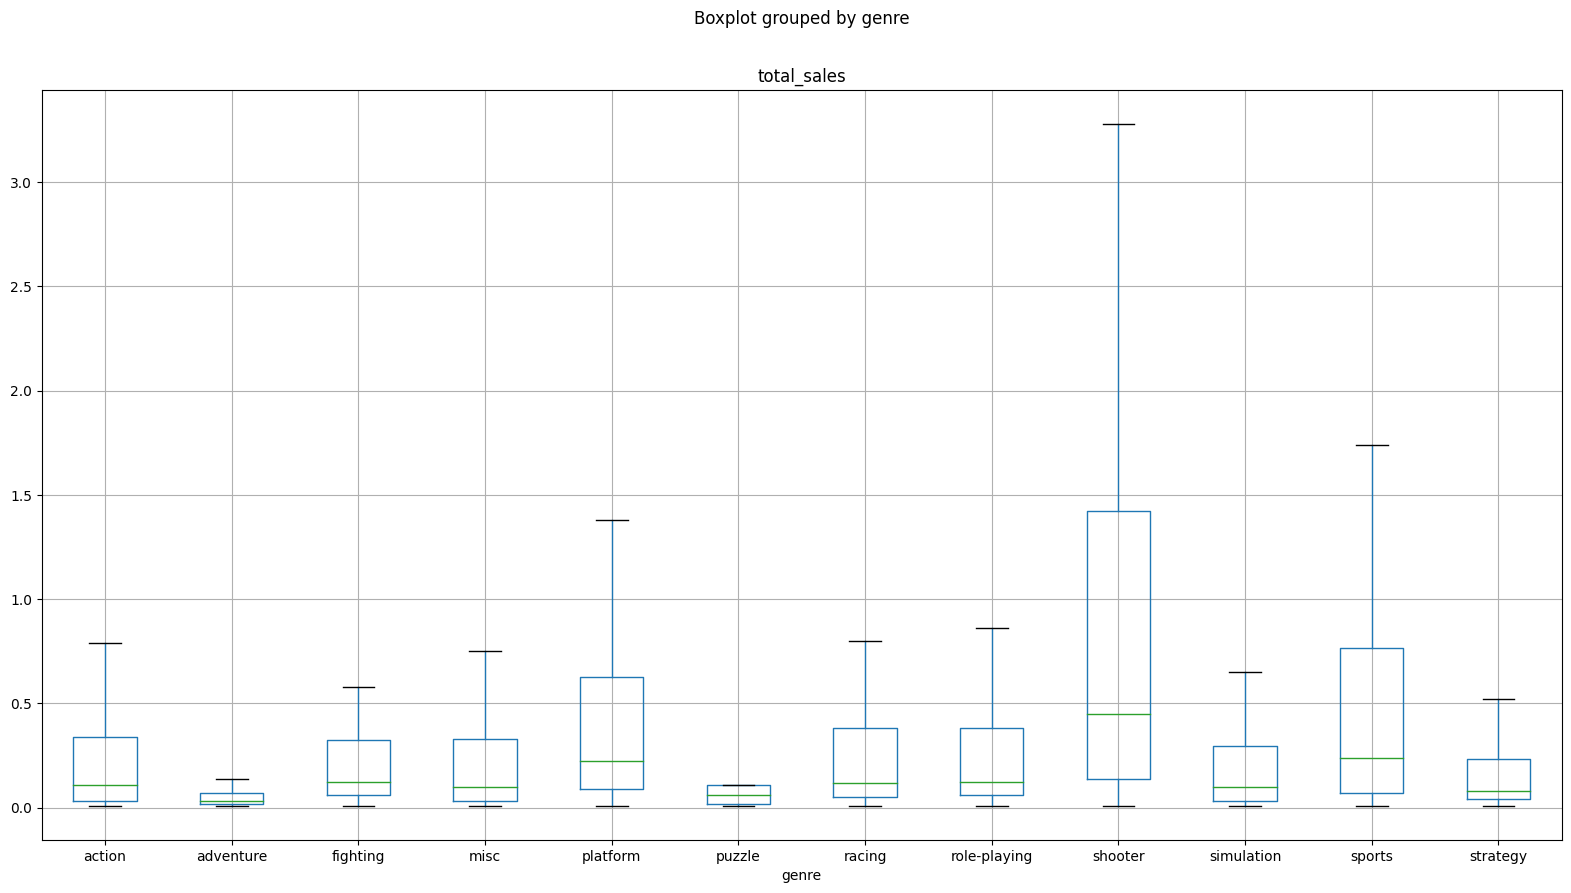

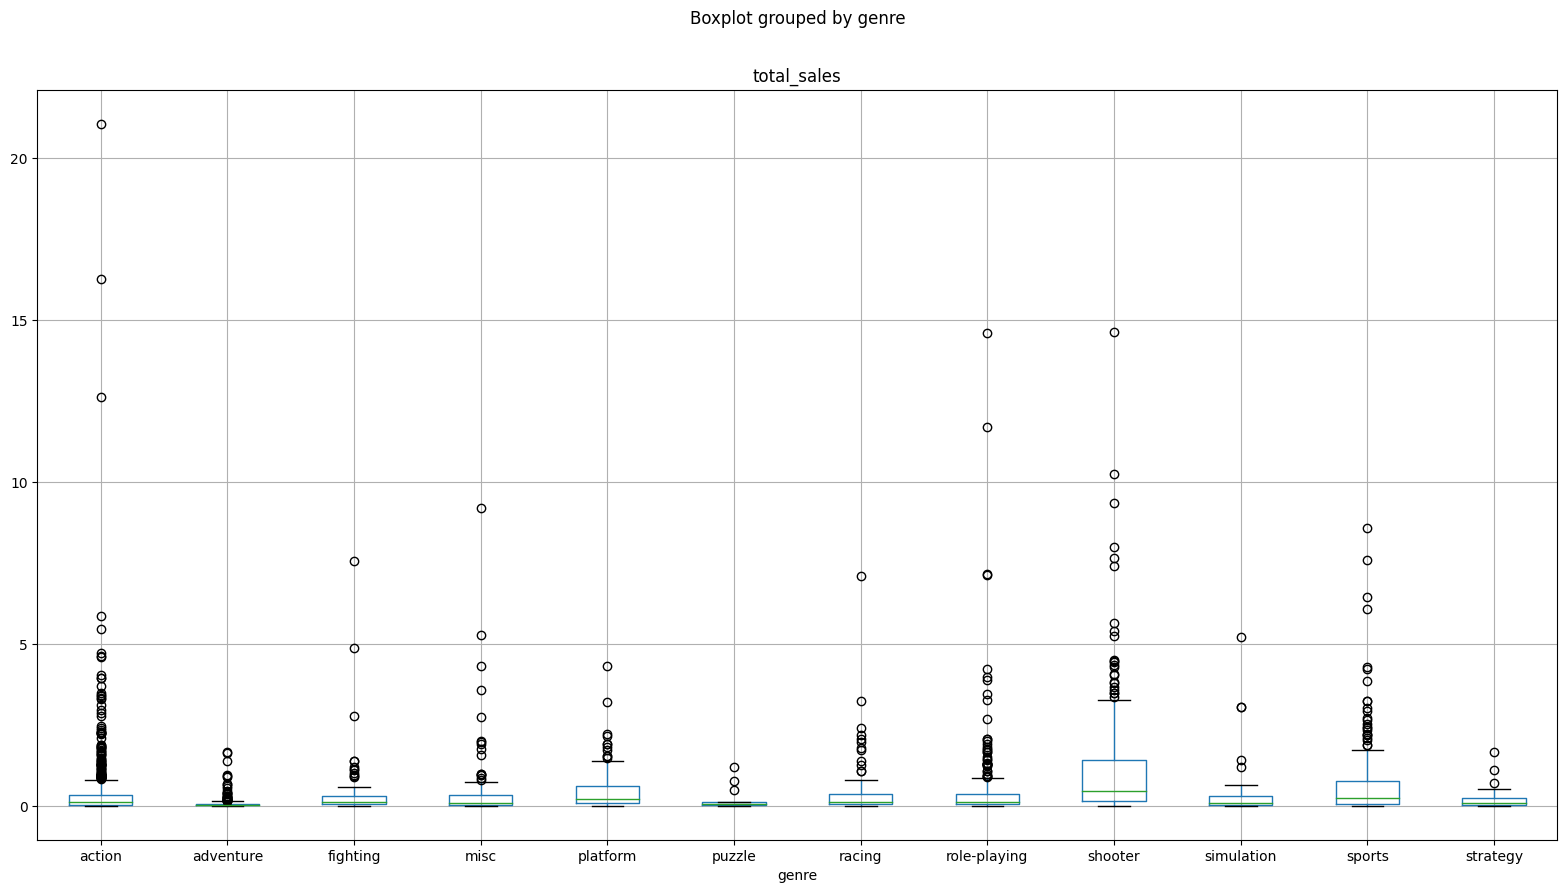

In [81]:
#Построим графики boxplot для самых продаваемых платформ
display(last_years_genre.groupby('genre')['total_sales'].describe())
last_years_genre.boxplot(column='total_sales', by='genre', figsize = (19,10), showfliers=False)
last_years_genre.boxplot(column='total_sales', by='genre', figsize = (19,10), showfliers=True)

Из полученного результата можно сделать вывод, что самые популярные жанры игр - это shooter, sports и platform. Этот же результат мы видели и при анализе "звездных" выбросов при рассмотрении графиков boxplot для самых продаваемых платформ. Менее всего пользуются популярностью adventure и Puzzle.

### Шаг. Составьте портрет пользователя каждого региона

In [82]:
#подготовим данные
games_actual = games.query('2013 <= year_of_release')
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float32
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 218.1+ KB


Наша задача составить портрет пользователя для каждого региона основываясь на актуальных данных.

#### ТОП самых продаваемых платформ

In [83]:
platform_tl_share = games_actual.groupby('platform')['total_sales'].sum()
print(platform_tl_share.sort_values(ascending=False))
platform_tl_share_sum = platform_tl_share.sum()
#print(platform_tl_share_sum)
print()
print('Доля продаж по миру по платформам: ',(platform_tl_share / platform_tl_share_sum * 100).sort_values(ascending=False).round(2))

platform
ps4     314.14
ps3     181.43
xone    159.32
3ds     143.25
x360    136.80
wiiu     64.63
pc       39.43
psv      32.99
wii      13.66
psp       3.50
ds        1.54
Name: total_sales, dtype: float64

Доля продаж по миру по платформам:  platform
ps4     28.80
ps3     16.63
xone    14.61
3ds     13.13
x360    12.54
wiiu     5.93
pc       3.62
psv      3.02
wii      1.25
psp      0.32
ds       0.14
Name: total_sales, dtype: float64


ТОП продаваемых платформ всего за актуальный период. 

ТОП продаваемых платформ в Северной Америке

platform
ps4     108.74
xone     93.12
x360     81.66
ps3      63.50
3ds      38.20
Name: na_sales, dtype: float64

count      5.00000
mean      77.04400
std       27.27947
min       38.20000
25%       63.50000
50%       81.66000
75%       93.12000
max      108.74000
Name: na_sales, dtype: float64

Доля продаж в Северной Америке по платформам:  platform
x360    59.69
xone    58.45
wii     48.02
wiiu    45.20
ds      37.01
ps3     35.00
ps4     34.62
pc      28.18
3ds     26.67
psv     15.28
psp      0.00
dtype: float64



<Axes: title={'center': 'ТОП продаваемых платформ в Северной Америке'}, ylabel='platform'>

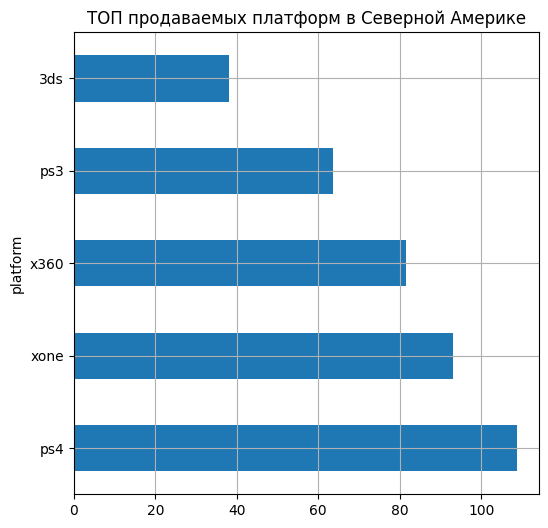

In [84]:
print('ТОП продаваемых платформ в Северной Америке')
print()
platform_na = games_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print(platform_na)
print()
print(platform_na.describe())
print()
platrform_na_share = games_actual.groupby('platform')['na_sales'].sum()
print('Доля продаж в Северной Америке по платформам: ', (platrform_na_share / platform_tl_share * 100).sort_values(ascending=False).round(2))
print()
platform_na.plot(x='platform', y='na_sales', title='ТОП продаваемых платформ в Северной Америке', kind='barh', figsize=(6, 6), grid=True)

Самые продаваемые платформы в Северной Америке: PS4, XOne, X360, PS3, 3DS. При этом самая высокая доля продаж приходящаяся на продажи в Северной Америке по отношению к общим продажам у платформ: X360, XOne, Wii, WiiU, DS. Средние продажи на 1 платформу составляют 77 млн копий.

ТОП продаваемых платформ в Европе

platform
ps4     141.09
ps3      67.81
xone     51.59
x360     42.52
3ds      30.96
Name: eu_sales, dtype: float64

count      5.000000
mean      66.794000
std       43.661746
min       30.960000
25%       42.520000
50%       51.590000
75%       67.810000
max      141.090000
Name: eu_sales, dtype: float64

Доля продаж в Европе по платформам:  platform
pc      64.32
ds      55.19
ps4     44.91
wii     43.41
ps3     37.38
xone    32.38
x360    31.08
wiiu    30.71
3ds     21.61
psv     18.49
psp      4.86
dtype: float64



<Axes: title={'center': 'ТОП продаваемых платформ в Европе'}, ylabel='platform'>

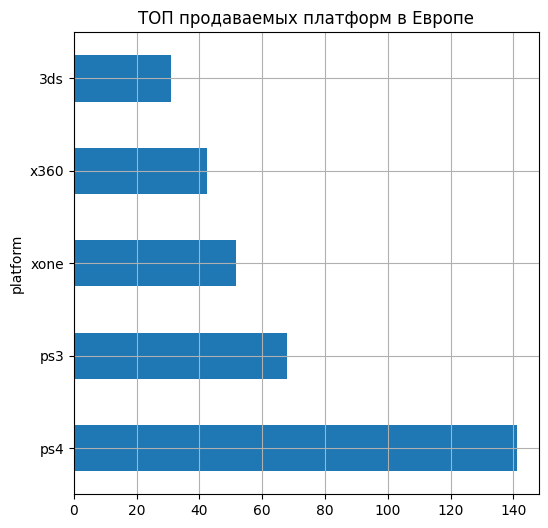

In [85]:
print('ТОП продаваемых платформ в Европе')
print()
platform_eu = games_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(platform_eu)
print()
print(platform_eu.describe())
print()
platrform_eu_share = games_actual.groupby('platform')['eu_sales'].sum()
print('Доля продаж в Европе по платформам: ', (platrform_eu_share / platform_tl_share * 100).sort_values(ascending=False).round(2))
print()
platform_eu.plot(x='platform', y='eu_sales', title='ТОП продаваемых платформ в Европе', kind='barh', figsize=(6, 6), grid=True)

Самые продаваемые платформы в Европе: PS4, PS3, XOne, X360, 3DS. При этом самая высокая доля продаж приходящаяся на продажи в Европе по отношению к общим продажам у платформ: PC, DS, PS4, Wii, PS3. Средние продажи на 1 платформу составляют 67 млн копий.

ТОП продаваемых платформ в Японии

platform
3ds     67.81
ps3     23.35
psv     18.59
ps4     15.96
wiiu    10.88
Name: jp_sales, dtype: float64

count     5.000000
mean     27.318000
std      23.079954
min      10.880000
25%      15.960000
50%      18.590000
75%      23.350000
max      67.810000
Name: jp_sales, dtype: float64

Доля продаж в Японии по платформам:  platform
psp     94.00
psv     56.35
3ds     47.34
wiiu    16.83
ps3     12.87
ps4      5.08
x360     0.37
wii      0.37
xone     0.21
ds       0.00
pc       0.00
dtype: float64



<Axes: title={'center': 'ТОП продаваемых платформ в Японии'}, ylabel='platform'>

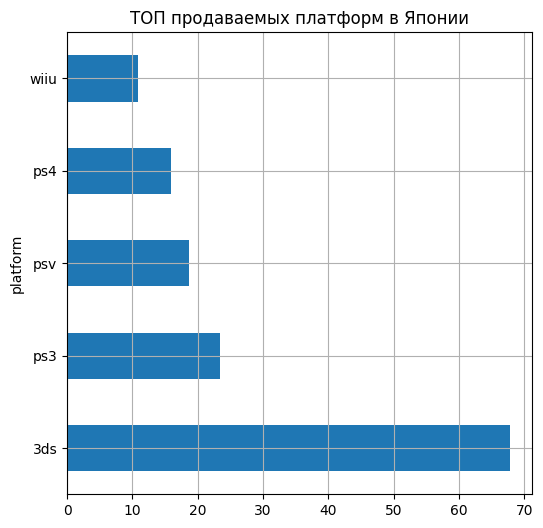

In [86]:
print('ТОП продаваемых платформ в Японии')
print()
platform_jp = games_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(platform_jp)
print()
print(platform_jp.describe())
print()
platrform_jp_share = games_actual.groupby('platform')['jp_sales'].sum()
print('Доля продаж в Японии по платформам: ', (platrform_jp_share / platform_tl_share * 100).sort_values(ascending=False).round(2))
print()
platform_jp.plot(x='platform', y='jp_sales', title='ТОП продаваемых платформ в Японии', kind='barh', figsize=(6, 6), grid=True)

Самые продаваемые платформы в Японии: 3DS, PS3, PSV, PS4, WiiU. При этом самая высокая доля продаж приходящаяся на продажи в Японии по отношению к общим продажам у платформ: PSP, PSV, 3DS, WiiU, PS3. Средние продажи на 1 платформу составляют 27 млн копий. В Японии результаты кардинально отличаются от остальных регионов тем, что 3ку самых продаваемых платформ занимают портативные платформы, как и долю в общих мировых продажах, хотя мы ранее видели, что в целом продажи портативных платформ падают, что конечно характеризует японцев как достаточно консервативных людей в разрезе продаж игровых платформ.

ТОП продаваемых платформ в других странах

platform
ps4     48.35
ps3     26.77
xone    14.27
x360    12.11
3ds      6.28
Name: other_sales, dtype: float64

count     5.000000
mean     21.556000
std      16.738975
min       6.280000
25%      12.110000
50%      14.270000
75%      26.770000
max      48.350000
Name: other_sales, dtype: float64

Доля продаж в других странах по платформам:  platform
ps4     15.39
ps3     14.76
psv      9.88
xone     8.96
x360     8.85
wii      8.20
ds       7.79
pc       7.51
wiiu     7.26
3ds      4.38
psp      1.14
dtype: float64



<Axes: title={'center': 'ТОП продаваемых платформ в других странах'}, ylabel='platform'>

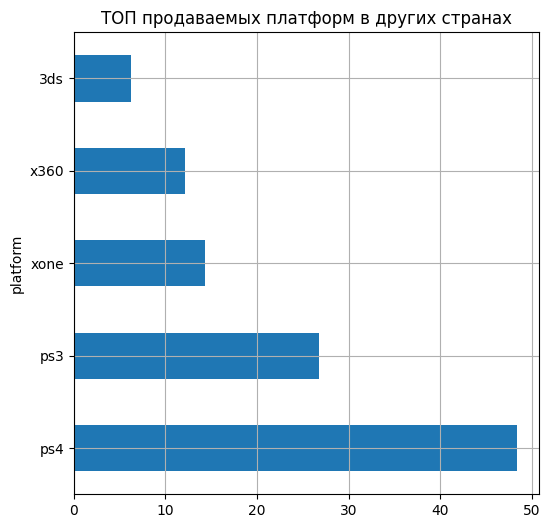

In [87]:
print('ТОП продаваемых платформ в других странах')
print()
platform_ot = games_actual.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)
print(platform_ot)
print()
print(platform_ot.describe())
print()
platrform_ot_share = games_actual.groupby('platform')['other_sales'].sum()
print('Доля продаж в других странах по платформам: ', (platrform_ot_share / platform_tl_share * 100).sort_values(ascending=False).round(2))
print()
platform_ot.plot(x='platform', y='other_sales', title='ТОП продаваемых платформ в других странах', kind='barh', figsize=(6, 6), grid=True)

Самые продаваемые платформы в остальных странах: PS4, PS3, XOne, X360, 3DS. При этом самая высокая доля продаж приходящаяся на продажи в остальных по отношению к общим продажам у платформ: PS4, PS3, PSV, XOne, X360. Средние продажи на 1 платформу составляют 21,5 млн копий.

<b>Резюмируя самые продаваемые платформы по разным регионам:</b><br>
<li>ТОП5 самых продаваемых платформ в Северной Америке: PS4, XOne, X360, PS3, 3DS.</li><br>
<li>ТОП5 самых продаваемых платформ в Европе: PS4, PS3, XOne, X360, 3DS.</li><br>
<li>ТОП5 самых продаваемых платформ в Японии: 3DS, PS3, PSV, PS4, WiiU.</li><br>
<li>ТОП5 самых продаваемых платформ в других странах: PS4, PS3, XOne, X360, 3DS.</li><br>
<b>Cамые высокии доли продаж платформ по разным регионам:</b><br>
<li>ТОП5 доли продаж платформ в Северной Америке: X360, XOne, Wii, WiiU, DS.</li><br>
<li>ТОП5 доли продаж платформ в Европе: PC, DS, PS4, Wii, PS3.</li><br>
<li>ТОП5 доли продаж платформ в Японии: PSP, PSV, 3DS, WiiU, PS3.</li><br>
<li>ТОП5 доли продаж платформ в других странах: PS4, PS3, PSV, XOne, X360.</li><br>
PS4 лидирует по продажам практически везде кроме Японии. Не смотря на то что продажи портативных платформ в последние годы падают, 3DS все еще продается и в Америке, и в Европе, и в других странах, и является абсолютным лидером в Японии. Продукция Sony занимает 48,7% доли рынка в мире, из которых 45,4% приходится на 2 платформы PS4 и PS3. Мы видими, что в Америке, при абсолютном лидерстве PS4, львиную долю рынка занимают платформы американской корпорации Microsoft и японской Nintendo. Европа лидирует по продажам игр для PC, при том, что игры для PC не входят там даже в 5ку. Но как я уже говорил ранее, сегмент РС не самый большой, но достаточно стабильный уже долгие годы. Также следует отметить, что обьем продажа в Америке и Европе занимает болшьшую часть мировых продаж.

In [88]:
#добавим значение other в выборку, то что не вошло в ТОП5
platform_na_ot = games_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).tail(6)
platform_na['other'] = platform_na_ot.sum()
platform_eu_ot = games_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).tail(6)
platform_eu['other'] = platform_eu_ot.sum()
platform_jp_ot = games_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).tail(6)
platform_jp['other'] = platform_jp_ot.sum()
platform_ot_ot = games_actual.groupby('platform')['other_sales'].sum().sort_values(ascending=False).tail(6)
platform_ot['other'] = platform_ot_ot.sum()

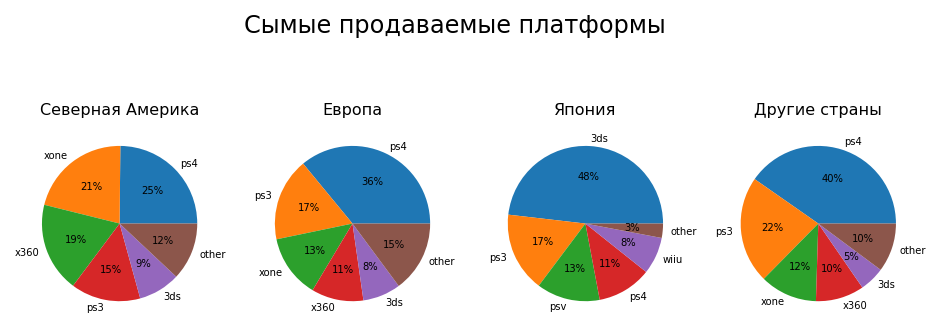

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8,3),dpi=144)
plt.suptitle("Сымые продаваемые платформы")
for ax, df, title in zip(axes, (platform_na, platform_eu, platform_jp, platform_ot), ('Северная Америка', 'Европа', 'Япония', 'Другие страны')):
    ax.pie(df, labels=df.index, textprops={'fontsize': 5}, autopct='%1.0f%%')
    ax.set_title(title, fontdict={"fontsize":8})
plt.show()

#### ТОП самых продаваемых жанров

In [93]:
genre_tl_share = games_actual.groupby('genre')['total_sales'].sum()
print(genre_tl_share.sort_values(ascending=False))
genre_tl_share_sum = genre_tl_share.sum()
print()
print('Доля продаж по миру по платформам: ',(genre_tl_share / genre_tl_share_sum * 100).sort_values(ascending=False).round(2))

genre
action          321.87
shooter         232.98
sports          150.65
role-playing    145.89
misc             62.82
platform         42.63
racing           39.89
fighting         35.31
adventure        23.64
simulation       21.76
strategy         10.08
puzzle            3.17
Name: total_sales, dtype: float64

Доля продаж по миру по платформам:  genre
action          29.51
shooter         21.36
sports          13.81
role-playing    13.38
misc             5.76
platform         3.91
racing           3.66
fighting         3.24
adventure        2.17
simulation       2.00
strategy         0.92
puzzle           0.29
Name: total_sales, dtype: float64


ТОП продаваемых жаноров за актуальный период

ТОП продаваемых жанров в Северной Америке

genre
action          126.05
shooter         109.74
sports           65.27
role-playing     46.40
misc             27.49
Name: na_sales, dtype: float64

count      5.000000
mean      74.990000
std       41.781583
min       27.490000
25%       46.400000
50%       65.270000
75%      109.740000
max      126.050000
Name: na_sales, dtype: float64

Доля продаж в Северной Америке по жанрам:  genre
shooter         47.10
fighting        44.04
misc            43.76
sports          43.33
platform        42.55
action          39.16
strategy        32.54
racing          32.49
role-playing    31.80
adventure       30.20
puzzle          26.18
simulation      22.33
dtype: float64



<Axes: title={'center': 'ТОП продаваемых жанров в Северной Америке'}, ylabel='genre'>

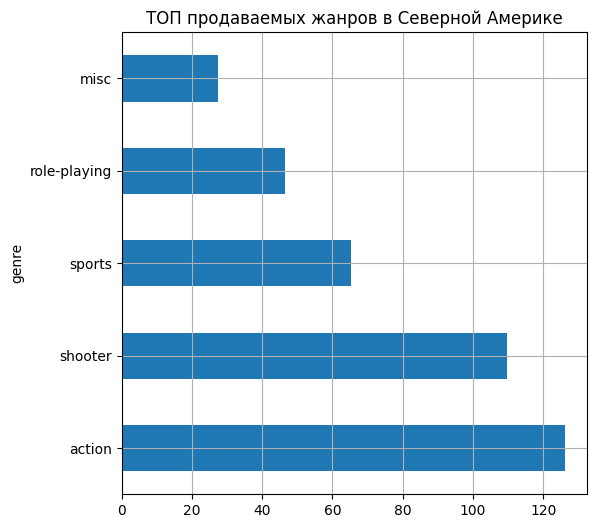

In [94]:
print('ТОП продаваемых жанров в Северной Америке')
print()
genre_na = games_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print(genre_na)
print()
print(genre_na.describe())
print()
genre_na_share = games_actual.groupby('genre')['na_sales'].sum()
print('Доля продаж в Северной Америке по жанрам: ', (genre_na_share / genre_tl_share * 100).sort_values(ascending=False).round(2))
print()
genre_na.plot(x='genre', y='na_sales', title='ТОП продаваемых жанров в Северной Америке', kind='barh', figsize=(6, 6), grid=True)

Самые продаваемые жанры в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc. При этом самая высокая доля продаж приходящаяся на продажи в Северной Америке по отношению к общим продажам жанров: Shooter, Fighting, Misc, Sports, Platform. Средние продажи на 1 жанр составляют 75 млн копий.

ТОП продаваемых жанров в Европе

genre
action          118.13
shooter          87.86
sports           60.52
role-playing     36.97
racing           20.19
Name: eu_sales, dtype: float64

count      5.000000
mean      64.734000
std       39.238725
min       20.190000
25%       36.970000
50%       60.520000
75%       87.860000
max      118.130000
Name: eu_sales, dtype: float64

Доля продаж в Европе по жанрам:  genre
racing          50.61
simulation      50.18
strategy        41.87
sports          40.17
shooter         37.71
action          36.70
platform        36.55
adventure       34.90
misc            31.90
puzzle          31.55
role-playing    25.34
fighting        24.21
dtype: float64



<Axes: title={'center': 'ТОП продаваемых жанров в Европе'}, ylabel='genre'>

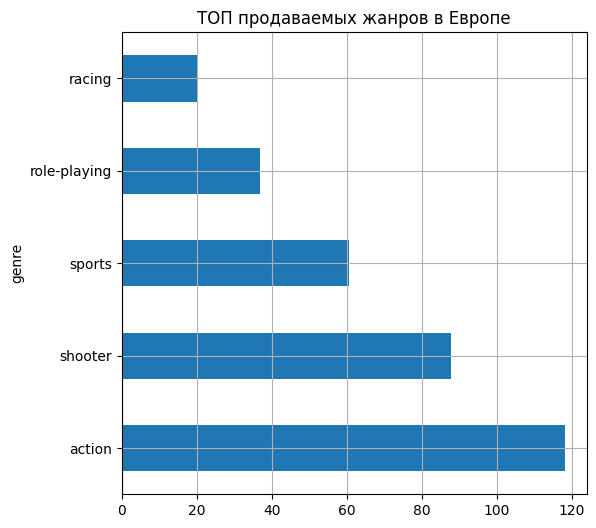

In [95]:
print('ТОП продаваемых жанров в Европе')
print()
genre_eu = games_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(genre_eu)
print()
print(genre_eu.describe())
print()
genre_eu_share = games_actual.groupby('genre')['eu_sales'].sum()
print('Доля продаж в Европе по жанрам: ', (genre_eu_share / genre_tl_share * 100).sort_values(ascending=False).round(2))
print()
genre_eu.plot(x='genre', y='eu_sales', title='ТОП продаваемых жанров в Европе', kind='barh', figsize=(6, 6), grid=True)

Самые продаваемые жанры в Европе: Action, Shooter, Sports, Role-Playing, Racing. При этом самая высокая доля продаж приходящаяся на продажи в Европе по отношению к общим продажам жанров: Racing, Simulation, Strategy, Sports, Shooter. Средние продажи на 1 жанр составляют 65 млн копий.

ТОП продаваемых жанров в Японии

genre
role-playing    51.04
action          40.49
misc             9.20
fighting         7.65
shooter          6.61
Name: jp_sales, dtype: float64

count     5.000000
mean     22.998000
std      21.135493
min       6.610000
25%       7.650000
50%       9.200000
75%      40.490000
max      51.040000
Name: jp_sales, dtype: float64

Доля продаж в Японии по жанрам:  genre
puzzle          37.22
role-playing    34.99
adventure       24.62
fighting        21.67
simulation      20.77
strategy        17.56
misc            14.65
action          12.58
platform        11.24
racing           5.77
sports           3.59
shooter          2.84
dtype: float64



<Axes: title={'center': 'ТОП продаваемых жанров в Японии'}, ylabel='genre'>

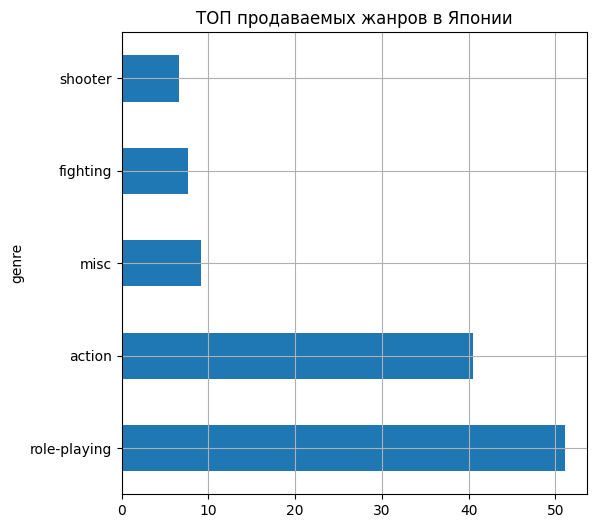

In [96]:
print('ТОП продаваемых жанров в Японии')
print()
genre_jp = games_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(genre_jp)
print()
print(genre_jp.describe())
print()
genre_jp_share = games_actual.groupby('genre')['jp_sales'].sum()
print('Доля продаж в Японии по жанрам: ', (genre_jp_share / genre_tl_share * 100).sort_values(ascending=False).round(2))
print()
genre_jp.plot(x='genre', y='jp_sales', title='ТОП продаваемых жанров в Японии', kind='barh', figsize=(6, 6), grid=True)

Самые продаваемые жанры в Японии: Role-Playing, Action, Misc, Fighting, Shooter. При этом самая высокая доля продаж приходящаяся на продажи в Японии по отношению к общим продажам жанров: Puzzle, Role-Playing, Adventure, Fighting, Simulation. Средние продажи на 1 жанр составляют 23 млн копий.

ТОП продаваемых жанров в других странах

genre
action          37.20
shooter         28.77
sports          19.45
role-playing    11.48
misc             6.09
Name: other_sales, dtype: float64

count     5.000000
mean     20.598000
std      12.622855
min       6.090000
25%      11.480000
50%      19.450000
75%      28.770000
max      37.200000
Name: other_sales, dtype: float64

Доля продаж в других странах по жанрам:  genre
sports          12.91
shooter         12.35
action          11.56
racing          11.13
adventure       10.28
fighting        10.08
misc             9.69
platform         9.66
strategy         8.04
role-playing     7.87
simulation       6.71
puzzle           5.05
dtype: float64



<Axes: title={'center': 'ТОП продаваемых жанров в других странах'}, ylabel='genre'>

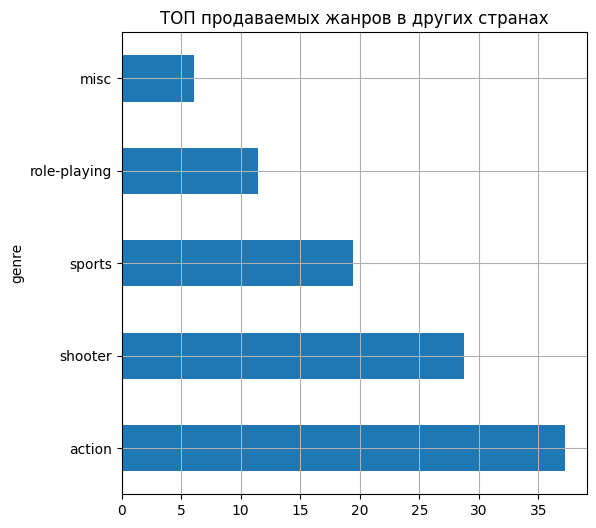

In [97]:
print('ТОП продаваемых жанров в других странах')
print()
genre_ot = games_actual.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5)
print(genre_ot)
print()
print(genre_ot.describe())
print()
genre_ot_share = games_actual.groupby('genre')['other_sales'].sum()
print('Доля продаж в других странах по жанрам: ', (genre_ot_share / genre_tl_share * 100).sort_values(ascending=False).round(2))
print()
genre_ot.plot(x='genre', y='other_sales', title='ТОП продаваемых жанров в других странах', kind='barh', figsize=(6, 6), grid=True)

Самые продаваемые жанры в других странах: Action, Shooter, Sports, Role-Playing, Misc. При этом самая высокая доля продаж приходящаяся на продажи в других по отношению к общим продажам жанров: Sports, Shooter, Action, Racing, Adventure. Средние продажи на 1 жанр составляют 21 млн копий.

<b>Резюмируя самые продаваемые жанры по разным регионам:</b><br>
<li>ТОП5 самых продаваемых жанров в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc.</li><br>
<li>ТОП5 самых продаваемых жанров в Европе:  Action, Shooter, Sports, Role-Playing, Racing.</li><br>
<li>ТОП5 самых продаваемых жанров в Японии: Role-Playing, Action, Misc, Fighting, Shooter.</li><br>
<li>ТОП5 самых продаваемых жанров в других странах: Action, Shooter, Sports, Role-Playing, Misc.</li><br>
<b>Cамые высокии доли продаж жанров по разным регионам:</b><br>
<li>ТОП5 самых продаваемых жанров в Северной Америке: Shooter, Fighting, Misc, Sports, Platform.</li><br>
<li>ТОП5 самых продаваемых жанров в Европе: Racing, Simulation, Strategy, Sports, Shooter..</li><br>
<li>ТОП5 самых продаваемых жанров в Японии: Puzzle, Role-Playing, Adventure, Fighting, Simulation.</li><br>
<li>ТОП5 самых продаваемых жанров в других странах: Sports, Shooter, Action, Racing, Adventure.</li><br>
Мы опять видим, что жанр Action лидирует везде кроме Японии. Хотя в Японии Action занимает также достаточно большой обьем, все же он уступает RPG. В целом, во всех странах кроме Японии, ТОП5 жанров одинаков, за исключением того что в Европе в 5ку также входит Racing. в отличие от всех остальных регионов. В Японии, как обычно, картина совершенно другая. Не зря говорят, что Япония - это другой мир. Львиную долю здесь занимают Role-Playing и Action. Если во всех остальных странах, ТОП5 распределены равномерно, то у японцев фактически есть 2 любимых жанра и все. 

In [98]:
#добавим значение other в выборку, то что не вошло в ТОП5
genre_na_ot = games_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).tail(7)
genre_na['other'] = genre_na_ot.sum()
genre_eu_ot = games_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).tail(7)
genre_eu['other'] = genre_eu_ot.sum()
genre_jp_ot = games_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).tail(7)
genre_jp['other'] = genre_jp_ot.sum()
genre_ot_ot = games_actual.groupby('genre')['other_sales'].sum().sort_values(ascending=False).tail(7)
genre_ot['other'] = genre_ot_ot.sum()

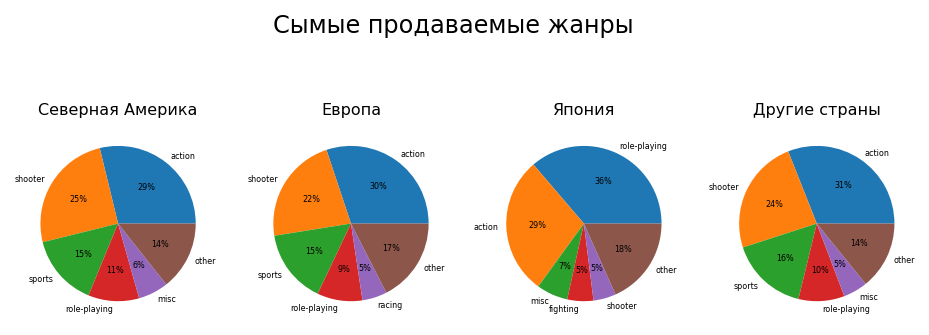

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8,3),dpi=144)
plt.suptitle("Сымые продаваемые жанры")
for ax, df, title in zip(axes, (genre_na, genre_eu, genre_jp, genre_ot), ('Северная Америка', 'Европа', 'Япония', 'Другие страны')):
    ax.pie(df, labels=df.index, textprops={'fontsize': 4}, autopct='%1.0f%%')
    ax.set_title(title, fontdict={"fontsize":8})
plt.show()

#### ТОП рейтинга ESRB

Рассчитаем какой рейтинг ESRB имеют игры, продаваемые в каждом регионе. Для начала посмотрим как распределяется рейтинг в мире.

In [101]:
esrb_tl_share = games_actual.groupby('rating')['total_sales'].sum()
print(esrb_tl_share.sort_values(ascending=False))
games.isnull().sum()

rating
M       371.68
NR      276.84
E       200.16
T       126.62
E10+    115.39
Name: total_sales, dtype: float64


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

Мы видим, что основные продажи игр имеют рейтинг: М(«Для взрослых» 17+), T(«Подросткам» 13+), E(«Для всех»), E10+(«Для всех от 10 лет и старше»). Но очень большую долю занимают игры, у которых отсутствует рейтинг ESRB

Рейтинг ESRB ТОП продаваемых игр в Северной Америке

rating
M       165.21
NR       89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64



<Axes: title={'center': 'Рейтинг ESRB ТОП продаваемых игр в Северной Америке'}, ylabel='rating'>

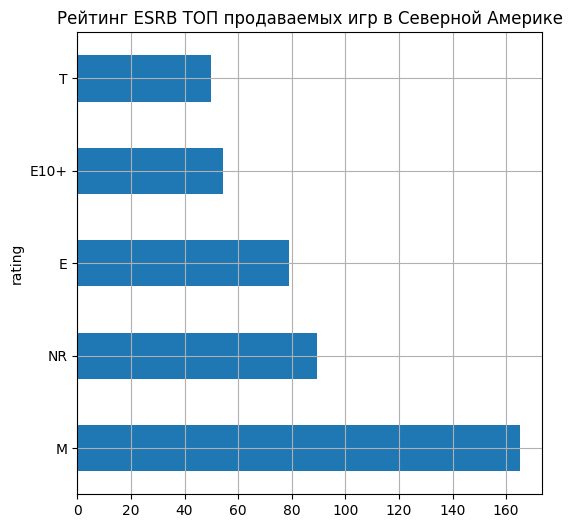

In [102]:
print('Рейтинг ESRB ТОП продаваемых игр в Северной Америке')
print()
esrb_na = games_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print(esrb_na)
print()

#esrb_na_share = games_actual.groupby('rating')['na_sales'].sum()
#print('Доля продаж в Северной Америке по ESRB: ', (esrb_na_share / esrb_tl_share * 100).sort_values(ascending=False).round(2))
#print()
esrb_na.plot(x='rating', y='other_sales', title='Рейтинг ESRB ТОП продаваемых игр в Северной Америке', kind='barh', figsize=(6, 6), grid=True)

В Северной Америке продаваемые игры имеют следующий рейтингd в порядке убывания: M, E, T, E10+, на втором месте игры с отсутствующим рейтингом.

Рейтинг ESRB ТОП продаваемых игр в Европе

rating
M       145.32
E        83.36
NR       78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64



<Axes: title={'center': 'Рейтинг ESRB ТОП продаваемых игр в Европе'}, ylabel='rating'>

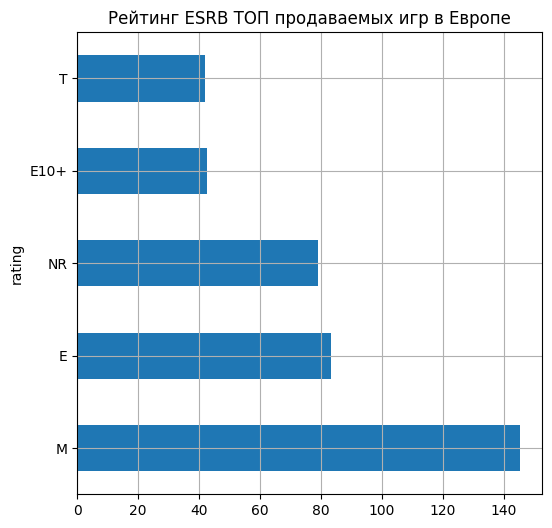

In [103]:
print('Рейтинг ESRB ТОП продаваемых игр в Европе')
print()
esrb_eu = games_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(esrb_eu)
print()

#esrb_eu_share = games_actual.groupby('rating')['eu_sales'].sum()
#print('Доля продаж в Европе по ESRB: ', (esrb_eu_share / esrb_tl_share * 100).sort_values(ascending=False).round(2))
#print()
esrb_eu.plot(x='rating', y='eu_sales', title='Рейтинг ESRB ТОП продаваемых игр в Европе', kind='barh', figsize=(6, 6), grid=True)

В Европе продаваемые игры имеют следующий рейтинг в порядке убывания: M, E, T, E10+, третье место занимают игры с отсутствием рейтинга NR

Рейтинг ESRB ТОП продаваемых игр в Японии

rating
NR      85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64



<Axes: title={'center': 'Рейтинг ESRB ТОП продаваемых игр в Япони'}, ylabel='rating'>

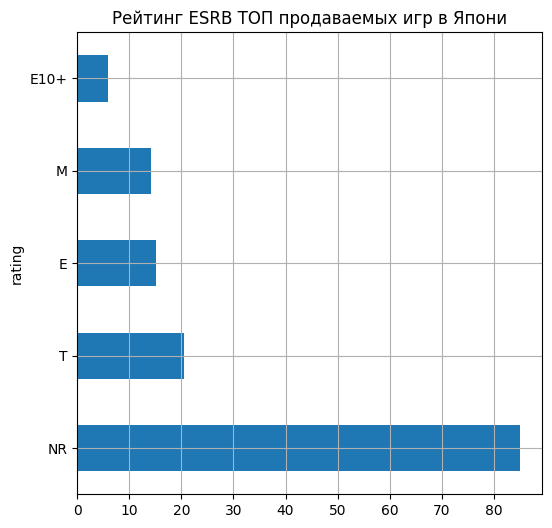

In [104]:
print('Рейтинг ESRB ТОП продаваемых игр в Японии')
print()
esrb_jp = games_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(esrb_jp)
print()

#esrb_jp_share = games_actual.groupby('rating')['jp_sales'].sum()
#print('Доля продаж в Японии по ESRB: ', (esrb_jp_share / esrb_tl_share * 100).sort_values(ascending=False).round(2))
#print()
esrb_jp.plot(x='rating', y='jp_sales', title='Рейтинг ESRB ТОП продаваемых игр в Япони', kind='barh', figsize=(6, 6), grid=True)

В Японии продаваемые игры имеют следующий рейтинг в порядке убывания: T, E, M, E10+, но наибольшую долю, имеют игры у которых рейтинг отсутствует.

Рейтинг ESRB ТОП продаваемых игр в других странах

rating
M       47.04
NR      23.46
E       22.61
T       14.29
E10+    12.57
Name: other_sales, dtype: float64



<Axes: title={'center': 'Рейтинг ESRB ТОП продаваемых игр в других странах'}, ylabel='rating'>

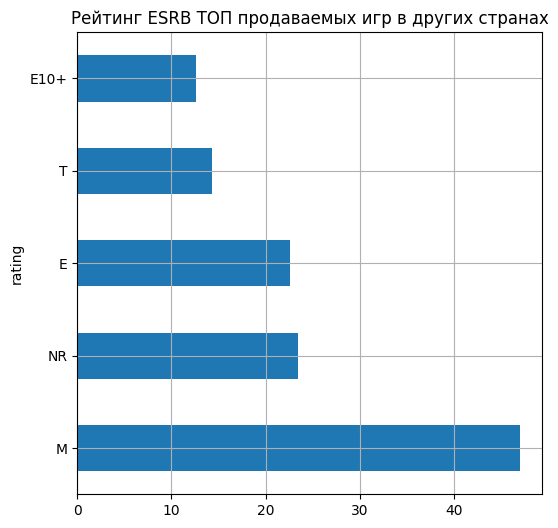

In [105]:
print('Рейтинг ESRB ТОП продаваемых игр в других странах')
print()
esrb_ot = games_actual.groupby('rating')['other_sales'].sum().sort_values(ascending=False).head(5)
print(esrb_ot)
print()

#esrb_ot_share = games_actual.groupby('rating')['other_sales'].sum()
#print('Доля продаж в других странах по ESRB: ', (esrb_ot_share / esrb_tl_share * 100).sort_values(ascending=False).round(2))
#print()
esrb_ot.plot(x='rating', y='other_sales', title='Рейтинг ESRB ТОП продаваемых игр в других странах', kind='barh', figsize=(6, 6), grid=True)

В других странах продаваемые игры имеют следующий рейтинг в порядке убывания: M, E, T, E10+, второе место по факту занимают игры у которых рейтинг отсутствует.

<b>Продаваемые игры имеют следующий рейтинг в порядке убывания:</b><br>
<li>В Северной Америке: M, NR, E, T, E10+</li><br>
<li>В Европе: M, E, NR, T, E10+</li><br>
<li>В Японии: NR, T, E, M, E10+</li><br>
<li>В других странах: M, NR, E, T, E10+</li><br>
<s>Как мы видим, и здесь Япония отличается от остальных стран. Если во всех остальных странах, включая Северную Америку и Европу, в основном игры имеют ESRB рейтинг с равномерным убыванием M, E, T, E10+, то в Японии - T, E, M, E10+. То есть, если во всех странах преобладают игры для взрослых, то в Японии для подростков и детей. Не зря говорят, что Японцы как дети.</s><br>
Как мы теперь видим, значительная часть проданных игр не имеет рейтинга, а в Японии, так и большая их часть. На мой взгляд, обьснить это можно только тем, что в каждом регионе своя рейтинг система, и не все игры имеют рейтинг ESRB, если они например имеют не американское происхождение, так как ESRB - это американский рейтинг. Соответственно в Европе это PEGI, а в Японии это CERO. 

<b>Составим портрет пользователя каждого региона:</b><br>
<br>
<li>В Северной Америке: человек старше 17 лет, предпочитающий играть на PS4 и Xbox One, и любящий жанры Action и Shooter</li><br>
<li>В Европе: человек старше 17 лет, предпочитающий играть на PS4 и PS3, и любящий жанры Action и Shooter</li><br>
<li>В Японии: подросток старше 13 лет, предпочитающий играть на 3DS, и любящий жанры Role-Playing и Action</li><br>
<li>В других странах: человек старше 17 лет, предпочитающий играть на PS4 и PS3, и любящий жанры Action и Shooter</li><br>

### Шаг. Проверьте гипотезы

#### Проверка гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
За Нулевую гипотезу берем, что средние пользовательские рейтинги платформ Xbox One и PC равны, за альтернативную гипотезу берем что средние пользовательские рейтинги платформ Xbox One и PC не равны. 

<b> Выбор уровня критической значимости </b> <br> 
При выборе критического уровня значимости необходимо обращать внимание на объем выборки. Общая идея тут следующая. При малом объеме выборки более вероятно получить случайный  результат, например, получить различие в двух в выборках при их однородности.  Следовательно, можно взять большую вероятность ошибки первого рода. При увеличении объема выборки случайные отклонения компенсируют друг друга, и получить значимое различие в выборках при их однородности менее вероятно. Следовательно, надо брать меньший уровень значимости. Стандартными уровнями значимости являются 0,1; 0,05; 0,01; 0,001. Поэтому нельзя всегда брать уровень значимость 0,05. Можно придерживаться следующих условных границ зависимости объема выборки от уровня значимости. Если объем выборки небольшой до 100 единиц, то можно вполне отвергнуть нулевую гипотезу при уровне значимости 0,05 или даже 0,1. При объеме выборки, измеряемой сотнями – от 100 до 1000, следует понизить уровень значимости хотя бы до 0,01. А при больших выборках, измеряемых тысячами наблюдений, уверенно отвергать нулевую гипотезу можно только при значимости меньшей 0,001.

Подготовим данные для сравнения

name platform  year_of_release  \
165                 grand theft auto v     xone             2014   
179     call of duty: advanced warfare     xone             2014   
242                  halo 5: guardians     xone             2015   
270                          fallout 4     xone             2015   
373            assassin's creed: unity     xone             2014   
398                            destiny     xone             2014   
413     gears of war: ultimate edition     xone             2015   
417                            fifa 16     xone             2015   
422  halo: the master chief collection     xone             2014   
484                          titanfall     xone             2014   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
165        action      2.81      2.19      0.00         0.47          97.0   
179       shooter      3.22      1.55      0.01         0.48          81.0   
242       shooter      2.78      1.27      0.03         0.41          84.0   
270  role-playing      2.51      1.32      0.01         0.38          88.0   
373        action      2.27      0.90      0.00         0.33          72.0   
398       shooter      2.14      0.92      0.00         0.31          75.0   
413       shooter      2.61      0.33      0.00         0.34          82.0   
417        sports      0.89      2.12      0.00         0.24          84.0   
422       shooter      1.91      1.00      0.03         0.29          85.0   
484       shooter      1.84      0.80      0.04         0.27          86.0   

     user_score rating  total_sales  
165         7.9      M         5.47  
179         5.4      M         5.26  
242         6.4      T         4.49  
270         6.2      M         4.22  
373         4.1      M         3.50  
398         5.5      T         3.37  
413         7.5      M         3.28  
417         4.4      E         3.25  
422         7.2      M         3.23  
484         6.4      M         2.95

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 165 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             182 non-null    object 
 1   platform         182 non-null    object 
 2   year_of_release  182 non-null    int64  
 3   genre            182 non-null    object 
 4   na_sales         182 non-null    float64
 5   eu_sales         182 non-null    float64
 6   jp_sales         182 non-null    float64
 7   other_sales      182 non-null    float64
 8   critic_score     182 non-null    float64
 9   user_score       182 non-null    float32
 10  rating           182 non-null    object 
 11  total_sales      182 non-null    float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 17.8+ KB
Пользовательский рейтинг XOne count    182.000000
mean       6.521428
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max    

/Users/denismaslov/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


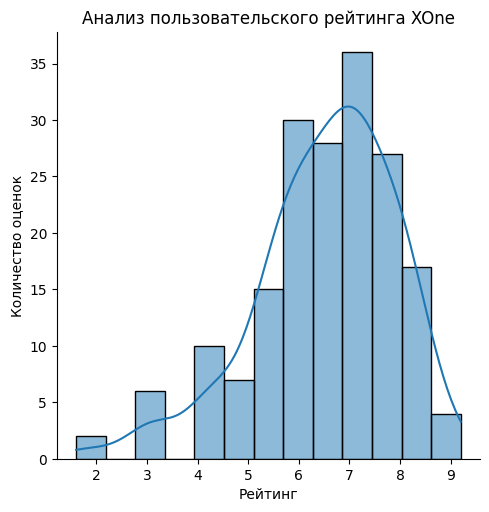

In [106]:
games_xone = games[(games['platform'] == 'xone') & (games['user_score'] > 0)]
display(games_xone.head(10))
games_xone.info()
games_xone.isnull().sum()
print('Пользовательский рейтинг XOne', games_xone['user_score'].describe())
ax = sns.displot(games_xone['user_score'], discrete = False, kde = True)
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.title('Анализ пользовательского рейтинга XOne')
plt.show()

name platform  year_of_release  \
458                         the sims 4       pc             2014   
1095  starcraft ii: heart of the swarm       pc             2013   
1351                    simcity (2013)       pc             2013   
1437                     battlefield 4       pc             2013   
1530                         fallout 4       pc             2015   
1730                grand theft auto v       pc             2015   
2303          the elder scrolls online       pc             2014   
2784           dragon age: inquisition       pc             2014   
2829                total war: rome ii       pc             2013   
2851          the witcher 3: wild hunt       pc             2015   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
458     simulation      1.00      1.82       0.0         0.23          70.0   
1095      strategy      0.83      0.66       0.0         0.18          86.0   
1351    simulation      0.48      0.77       0.0         0.17          64.0   
1437       shooter      0.39      0.87       0.0         0.10          81.0   
1530  role-playing      0.51      0.67       0.0         0.10          84.0   
1730        action      0.39      0.69       0.0         0.09          96.0   
2303  role-playing      0.32      0.51       0.0         0.07          71.0   
2784  role-playing      0.33      0.34       0.0         0.06          85.0   
2829      strategy      0.12      0.53       0.0         0.07          76.0   
2851  role-playing      0.21      0.46       0.0         0.05          93.0   

      user_score rating  total_sales  
458          3.9      T         3.05  
1095         7.9      T         1.67  
1351         2.2   E10+         1.42  
1437         6.0      M         1.36  
1530         5.4      M         1.28  
1730         7.9      M         1.17  
2303         5.7      M         0.90  
2784         5.9      M         0.73  
2829         4.2      T         0.72  
2851         9.3      M         0.72

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             155 non-null    object 
 1   platform         155 non-null    object 
 2   year_of_release  155 non-null    int64  
 3   genre            155 non-null    object 
 4   na_sales         155 non-null    float64
 5   eu_sales         155 non-null    float64
 6   jp_sales         155 non-null    float64
 7   other_sales      155 non-null    float64
 8   critic_score     155 non-null    float64
 9   user_score       155 non-null    float32
 10  rating           155 non-null    object 
 11  total_sales      155 non-null    float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 15.1+ KB
Пользовательский рейтинг PC count    155.000000
mean       6.269678
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max      

/Users/denismaslov/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


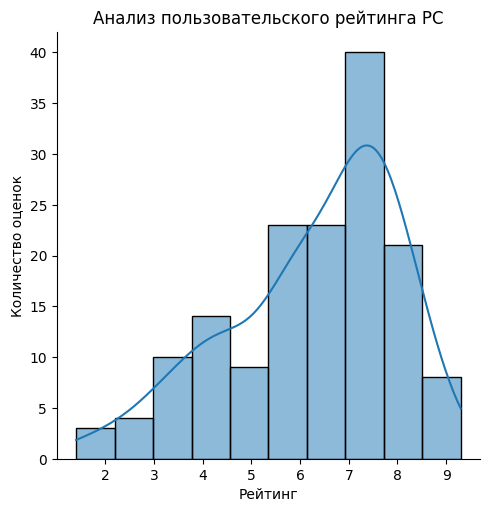

In [107]:
games_pc = games[(games['platform'] == 'pc') & (games['year_of_release'] >= 2013) & (games['user_score'] > 0)]
display(games_pc.head(10))
games_pc.info()
games_pc.isnull().sum()
print('Пользовательский рейтинг PC', games_pc['user_score'].describe())
ax = sns.displot(games_pc['user_score'], discrete = False, kde = True)
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.title('Анализ пользовательского рейтинга PC')


plt.show()

За нулевую гипотезу возьмем что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. За альтернативную, что они разные.

In [108]:
alpha = 0.01 #за уровень критической значимости возьмем 0.01, так как обьем выборки у нас от 100 до 1000.
results = st.ttest_ind(games_xone['user_score'], games_pc['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012765210016787
Не получилось отвергнуть нулевую гипотезу


В результате наших вычислений у нас не получилось отвергнуть нулевую гипотезу, ввиду того что вероятность того что выборки одинаковые равны 14%, что значительно больше порога уровня значимости, который мы задали в 1%, можно сделать вывод, что выборки одинаковые.

In [109]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />
Интерпретация результата:

Полученное значение p-value говорит о том, что хотя средний чек пришедших из разных каналов и неодинаков, <b>с вероятностью в почти 19% такое или большее различие можно получить случайно. </b>Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.
        
А если p-value  будет равно 0,9999, то это значит, что с вероятностью почти 100% <u>такое различие</u> можно получить случайно — то есть почти никогда :)  (но учитываем, что тест проводится на выборке из генеральной совокупности, все может поменяться)


#### Проверка гипотезы, что средние пользовательские рейтинги жанров Action и Sports разные.


За Нулевую гипотезу берем, что средние пользовательские рейтинги жанров Action и Sports равны, за альтернативную гипотезу берем что средние пользовательские рейтинги жанров Action и Sports не равны.

name platform  year_of_release   genre  \
16                       grand theft auto v      ps3             2013  action   
23                       grand theft auto v     x360             2013  action   
42                       grand theft auto v      ps4             2014  action   
149                          the last of us      ps3             2013  action   
165                      grand theft auto v     xone             2014  action   
231  uncharted: the nathan drake collection      ps4             2015  action   
235              luigi's mansion: dark moon      3ds             2013  action   
295                              watch dogs      ps4             2014  action   
304                 assassin's creed: unity      ps4             2014  action   
305                   batman: arkham knight      ps4             2015  action   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16       7.02      9.09      0.98         3.96          97.0         8.2   
23       9.66      5.14      0.06         1.41          97.0         8.1   
42       3.96      6.31      0.38         1.97          97.0         8.3   
149      2.41      2.18      0.28         0.99          95.0         9.1   
165      2.81      2.19      0.00         0.47          97.0         7.9   
231      2.07      1.71      0.08         0.76          86.0         8.1   
235      1.80      1.39      1.11         0.29          86.0         8.4   
295      1.40      1.90      0.11         0.64          80.0         6.3   
304      1.19      2.07      0.08         0.62          70.0         4.9   
305      1.53      1.69      0.10         0.64          87.0         7.6   

    rating  total_sales  
16       M        21.05  
23       M        16.27  
42       M        12.62  
149      M         5.86  
165      M         5.47  
231      T         4.62  
235      E         4.59  
295      M         4.05  
304      M         3.96  
305      M         3.96

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             389 non-null    object 
 1   platform         389 non-null    object 
 2   year_of_release  389 non-null    int64  
 3   genre            389 non-null    object 
 4   na_sales         389 non-null    float64
 5   eu_sales         389 non-null    float64
 6   jp_sales         389 non-null    float64
 7   other_sales      389 non-null    float64
 8   critic_score     389 non-null    float64
 9   user_score       389 non-null    float32
 10  rating           389 non-null    object 
 11  total_sales      389 non-null    float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 38.0+ KB
Пользовательский рейтинг Action count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max   

/Users/denismaslov/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


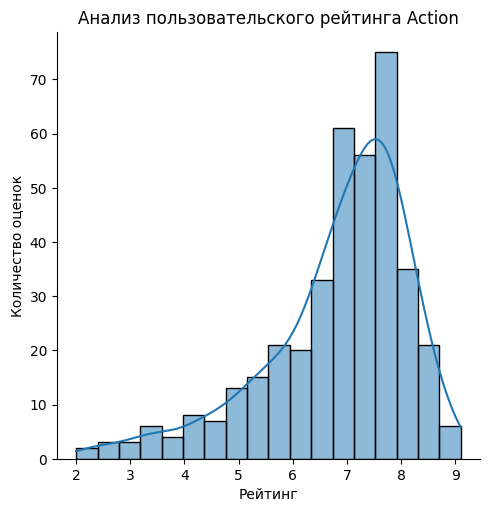

In [110]:
games_action = games[(games['genre'] == 'action') & (games['year_of_release'] >= 2013) & (games['user_score'] > 0)]
display(games_action.head(10))
games_action.info()
games_action.isnull().sum()
print('Пользовательский рейтинг Action', games_action['user_score'].describe())
ax = sns.displot(games_action['user_score'], discrete = False, kde = True)
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.title('Анализ пользовательского рейтинга Action')
plt.show()

In [111]:
#display(games_action['user_score'].value_counts())

Мы видим аномальный выброс в значении рейтинга 7.4, предлагаю удалить его.

In [106]:
#games_action['user_score'] = games_action['user_score'].round(1)

In [107]:
#display(games_action['user_score'][46])

In [108]:
#games_action = games_action[games_action['user_score'] != 7.4]

In [109]:
#display(games_action.head(10))

In [110]:
#display(games_action['user_score'].value_counts())
#games_action.info()

In [111]:
#ax = sns.displot(games_action['user_score'], discrete = False, kde = True)
#plt.xlabel('Рейтинг')
#plt.ylabel('Количество оценок')
#plt.title('Анализ пользовательского рейтинга Action')
#plt.show()

Теперь распределение рейтинга пользователей в жанре Action стало нормальным.

name platform  year_of_release   genre  na_sales  eu_sales  \
77         fifa 16      ps4             2015  sports      1.12      6.12   
94         fifa 17      ps4             2016  sports      0.66      5.75   
126        fifa 14      ps3             2013  sports      0.78      4.24   
143        fifa 15      ps4             2014  sports      0.80      4.33   
264        fifa 15      ps3             2014  sports      0.58      3.02   
271        fifa 14     x360             2013  sports      0.92      2.89   
314       nba 2k16      ps4             2015  sports      2.49      0.66   
417        fifa 16     xone             2015  sports      0.89      2.12   
420  madden nfl 16      ps4             2015  sports      2.34      0.30   
469        fifa 14      ps4             2013  sports      0.61      1.85   

     jp_sales  other_sales  critic_score  user_score rating  total_sales  
77       0.06         1.28          82.0         4.3      E         8.58  
94       0.08         1.11          85.0         5.0      E         7.60  
126      0.07         1.37          86.0         4.3      E         6.46  
143      0.05         0.90          82.0         5.7      E         6.08  
264      0.04         0.64           0.0         4.5      E         4.28  
271      0.01         0.40          84.0         4.2      E         4.22  
314      0.03         0.69          87.0         6.7   E10+         3.87  
417      0.00         0.24          84.0         4.4      E         3.25  
420      0.00         0.60          83.0         5.9      E         3.24  
469      0.11         0.44          87.0         6.3      E         3.01

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             160 non-null    object 
 1   platform         160 non-null    object 
 2   year_of_release  160 non-null    int64  
 3   genre            160 non-null    object 
 4   na_sales         160 non-null    float64
 5   eu_sales         160 non-null    float64
 6   jp_sales         160 non-null    float64
 7   other_sales      160 non-null    float64
 8   critic_score     160 non-null    float64
 9   user_score       160 non-null    float32
 10  rating           160 non-null    object 
 11  total_sales      160 non-null    float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 15.6+ KB
Пользовательский рейтинг Sports count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max   

/Users/denismaslov/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


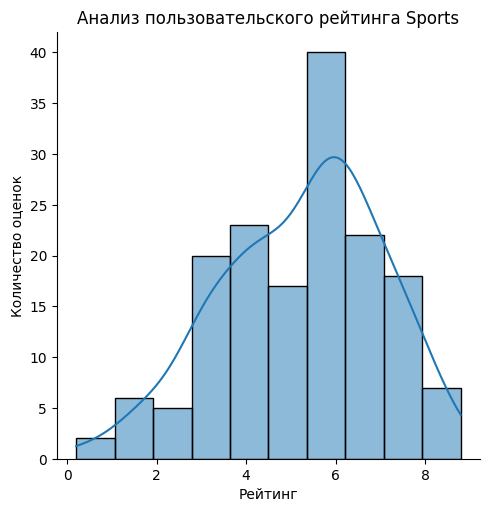

In [112]:
games_sports = games[(games['genre'] == 'sports') & (games['year_of_release'] >= 2013) & (games['user_score'] > 0)].copy()
display(games_sports.head(10))
games_sports.info()
games_sports.isnull().sum()
print('Пользовательский рейтинг Sports', games_sports['user_score'].describe())
ax = sns.displot(games_sports['user_score'], discrete = False, kde = True)
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.title('Анализ пользовательского рейтинга Sports')
plt.show()

In [113]:
#display(games_sports['user_score'].value_counts())

В жанре Sports, также аномальный выброс в значнии пользовательского рейтинга 7.4

In [114]:
#games_sports['user_score'] = games_sports['user_score'].round(1)
#games_sports = games_sports[games_sports['user_score'] != 7.4]
#display(games_sports.head(10))
#display(games_sports['user_score'].value_counts())
#games_sports.info()

In [115]:
'''
print('Пользовательский рейтинг Sports', games_sports['user_score'].describe())
ax = sns.displot(games_sports['user_score'], discrete = False, kde = True)
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.title('Анализ пользовательского рейтинга Sports')
plt.show()
'''

"\nprint('Пользовательский рейтинг Sports', games_sports['user_score'].describe())\nax = sns.displot(games_sports['user_score'], discrete = False, kde = True)\nplt.xlabel('Рейтинг')\nplt.ylabel('Количество оценок')\nplt.title('Анализ пользовательского рейтинга Sports')\nplt.show()\n"

Теперь пользовательский рейтинг также имеет нормальное распределение.

За нулевую гипотезу возьмем что Средние пользовательские рейтинги жанров Actione и Sports разные. За альтернативную, что они равны.

In [114]:
alpha = 0.01 #за уровень критической значимости возьмем 0.01, так как обьем выборки у нас больше 100.
results = st.ttest_ind(games_action['user_score'], games_sports['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517772011408453e-27
Отвергаем нулевую гипотезу


В результате вычислений, отвергаем нулевую гипотезу. Ввиду того, что вероятность того что выборки равны практически равны 0%, что значительно меньше порога уровеня значимости в 1%, можно сделать вывод, что выборки разные.

### Заключение
Мы проанализировали рынок компьютерных игр для интерент магазина «Стримчик».<br> 
<b>Подготовка данных</b><br>
Неявных дубликатов в данных не выявлено. Мы привели имена столбцов датафрейма к нижнему регистру, удалили ненужные пропуски в стобцах name и genre, удалили пропуски в столбце year_of_release, превели значение tbd в столбце user_score в значение NaN, <s>заполнили пропущенные значения пользовательского рейтинга и рейтинга критиков медианными значениями в зависимости от жанра</s> заполнили значения пользовательского рейтинга и рейтинга критиков константой, изменили тип столбца user_score на float, а столбца year_of_release на integer. Заполнили пропуски в ESRB рейтинге, значениями NR (not raiting), <s>наиболее популярными в конкретном жанре</s> . Посчитали суммарные продажи по всем регионам и записали их в отдельный столбец. Вычислили, что данные в датафрейме представлены с 1980 г по 2016 год.<br>
<b>Исследовательский анализ данных</b><br>
<li>Ответили отрицательно на вопрос, нужно ли для анализа использовать все периоды данных</li><br>
<li>Ответили на вопрос как менялись продажи по платформам. Выявили срок жизни популярных платформ, срок обновления их, а также срок жизни старой платформы после обновления</li><br>
<li>В результате анализа продаж популярных платформ вычислили актуальный срок для анализа и прогнозирования продаж</li><br>
<li>Получили результат, что игры на базе PC имеют небольшую, но стабильную долю рынка</li><br>
<li>Выявили, что рынок портативных игровых платформ постоянно снижается в результате развития рынка смартфонов, которые теперь служат портативной игровой платформой для пользователей</li><br>
<li>Выявили, что в среднем, популярность той или иной платформы зависит не столько от нее, сколько от "звездных" игр для нее, и обьем продаж в первую очередь зависит от них</li><br>
<li>Выявили тенденцию, что рейтинг критиков в прямую влияет на продажи, а также на рейтинг пользователей. Но ретинг пользователей на продажи не влияет</li><br>
<li>Выявили, что самые популярные жанры игр это Action, Shooter, Sports и Role-Playing, а менее всего пользуются популярностью Strategy и Puzzle</li><br>
<b>Портрет пользователя каждого региона</b><br>
<li>Выявили ТОП5 самых продаваемых платформ в каждом регионе</li><br>
<li>Выявили ТОП5 самых высоких долей продаж платформ в каждом регионе</li><br>
<li>Выявили ТОП5 самых продаваемых жанров в каждом регионе</li><br>
<li>Выявили ТОП5 самых высоких долей продаж жанров в каждом регионе</li><br>
<li>Выявили ТОП рейтинга ESRB в каждом регионе</li><br>
<br>
<li><b>Выявили что значительная доля проданных игр не имеет рейтинга ESRB в каждом регионе. Предположили, что это происходит из-за того, что в разных странах разная система возрастного рейтинга</b></li><br>
В результате по этим данным были составлены портреты пользователя в каждом регионе:<br>
<li>В Северной Америке: человек старше 17 лет, предпочитающий играть на PS4 и Xbox One, и любящий жанры Action и Shooter</li><br>
<li>В Европе: человек старше 17 лет, предпочитающий играть на PS4 и PS3, и любящий жанры Action и Shooter</li><br>
<li>В Японии: подросток старше 13 лет, предпочитающий играть на 3DS, и любящий жанры Role-Playing и Action</li><br>
<li>В других странах: человек старше 17 лет, предпочитающий играть на PS4 и PS3, и любящий жанры Action и Shooter</li><br>
<b>Проверены гипотезы</b><br>
<li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не получилось отвергнуть эту гипотезу</li><br>
<li>Средние пользовательские рейтинги жанров Action и Sports равны, отвергли эту гипотезу</li><br>
<b>Вывод и рекомендации</b><br>
При прогнозировании продаж и закупок необходимо обратить внимание на новые релизы популярных гигантов - Sony, Microsoft и Nintendo, а также на игры для PC, так как они на протяжении долгого времени занимают свой сегмент рынка. Продажи портативных игр падают, на что скорее всего повлияло развитие рынка смартфонов, куда и переместились портативные игры. Теперь нет необходимости иметь отдельную платформу для портативных игр. Особое внимание стоит уделить "звездным" сериям игр, их новым релизам, а также выходящим играм с высоким рейтиногом критиков, они послужат драйверами продаж. Особое внимание стоит уделять поддержанию продаж на рынках Северной Америки и Европы, так как на них приходится большая доля продаж. Продажи в остальных странах являются потенциалом для роста, так как население "остального мира", а соответственно и играющих пользователей кратно выше населения Северной Америки и Европы, хотя имеет и меньший уровень жизни. Особое внимание нужно уделить рынкам Китая, Индиии и Бразилии, так как экономика этих стран растет, а соответственно будет расти и доля пользователей компьютерных игр. 

### Бонус

In [116]:
data_games = pd.read_csv('/Users/denismaslov/yandex_projects/yandex/common_project_1_4/games.csv')

In [117]:
data_games.columns = map(str.lower, data_games.columns)

In [118]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [119]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [120]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [121]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [125]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
 #   sales = (
 #           sales.append({'platform': 'Other', region: df[region].sum() 
#                     - sales[region].sum()}, ignore_index= True)
 #        )
    sales = pd.concat([sales, pd.DataFrame([{'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}])], ignore_index=True)
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

/var/folders/m6/p5vph6054tb6jk619kdjy60w0000gn/T/ipykernel_38425/1692101241.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/m6/p5vph6054tb6jk619kdjy60w0000gn/T/ipykernel_38425/1692101241.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


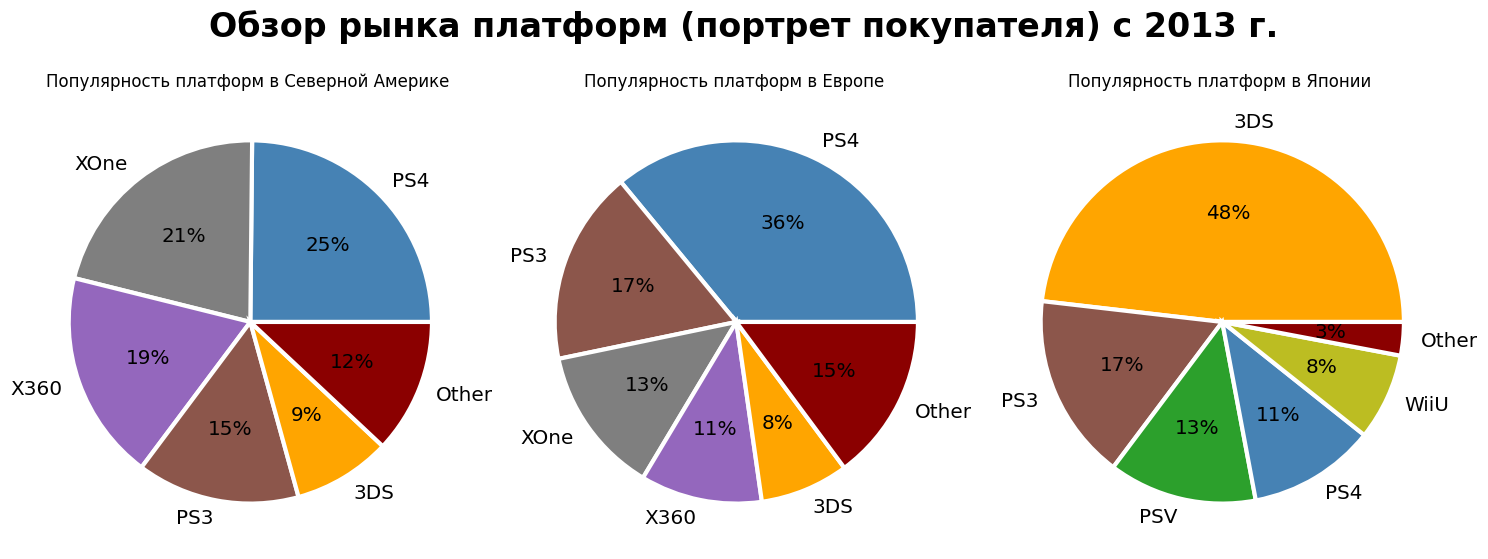

In [126]:
# check
# круги в ряд

x_year = 2013

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

Оптимальный период для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные

/var/folders/m6/p5vph6054tb6jk619kdjy60w0000gn/T/ipykernel_38425/1692101241.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/m6/p5vph6054tb6jk619kdjy60w0000gn/T/ipykernel_38425/1692101241.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


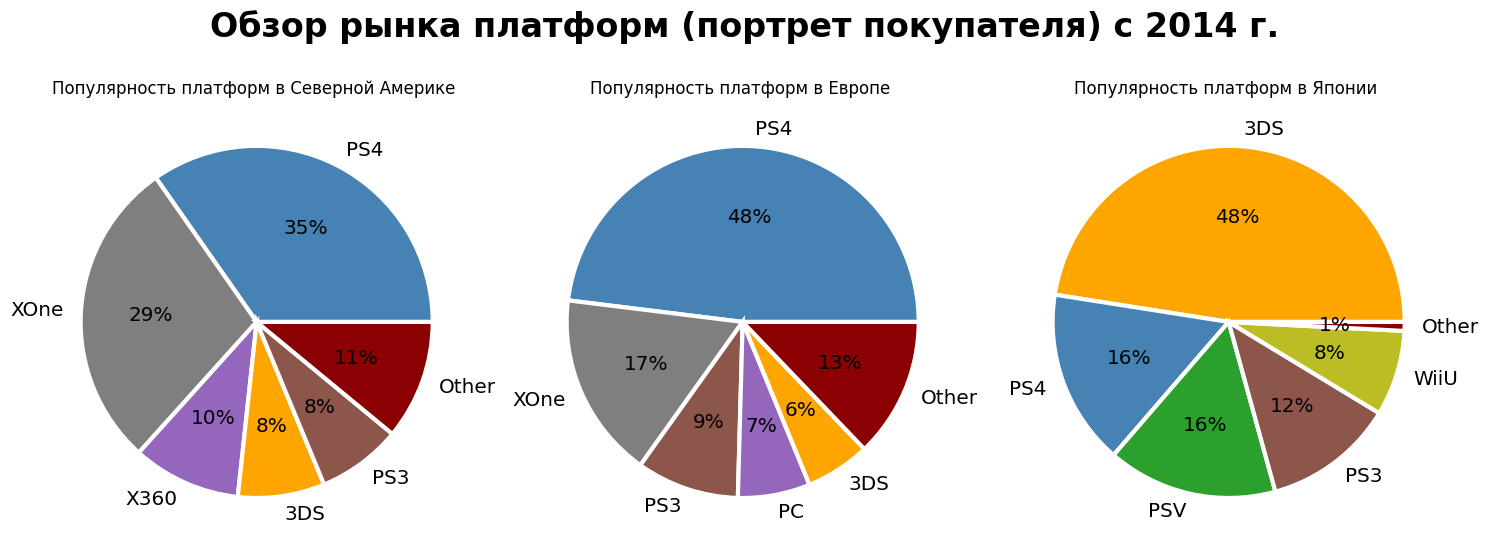

In [127]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

2015 год взят для акцентирования на изменении доли в продажах современных платформ

/var/folders/m6/p5vph6054tb6jk619kdjy60w0000gn/T/ipykernel_38425/1692101241.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/m6/p5vph6054tb6jk619kdjy60w0000gn/T/ipykernel_38425/1692101241.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


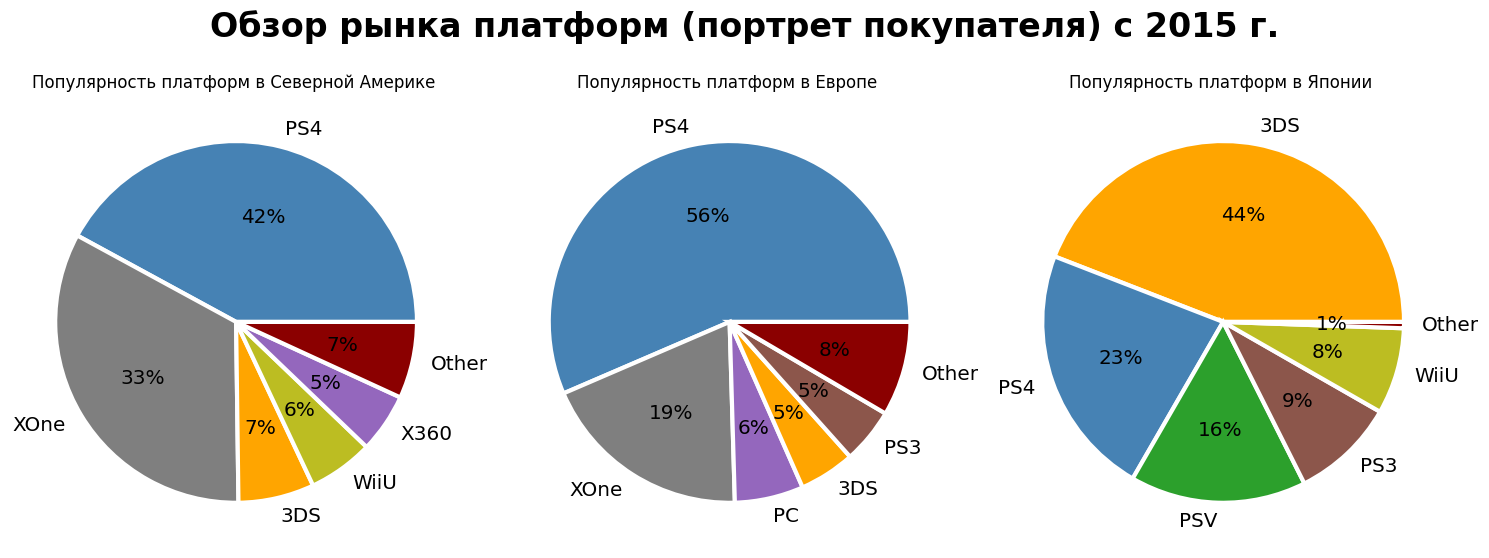

In [128]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])